<img src="PythonBootcamp/support_files/cropped-SummerWorkshop_Header.png", align="center">  

<h1 align="center">Project - Effects of motion correction on the observed measure</h1> 
<h3 align="center">Jose M. Ceballos</h3> 

#### Setting appropriate directory path, importing modules, and setting in-line plotting

In [1]:
# Setting path to external drive for accessing Allen SDK data
# OS X
drive_path = '/Volumes/Brain2016'

In [2]:
# Packages and modules of interest
import sys
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import h5py

from sklearn import svm

In [3]:
# In-line plotting
%matplotlib inline

#### Importing Brain Observatory Data from Allen SDK 

In [4]:
# Importing Bran Observatory Cached data from Allen SDK
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
from allensdk.brain_observatory.natural_scenes import NaturalScenes

manifest_path = os.path.join(drive_path, 'BrainObservatory/manifest.json')
 
boc = BrainObservatoryCache(manifest_file = manifest_path)

#### Pulling X- and Y-plane motion correction data for each frame 

In [5]:
# Getting metadata information
ExptMetaData = pd.DataFrame(boc.get_ophys_experiments())
ExptMetaData

,age_days,cre_line,experiment_container_id,id,imaging_depth,session_type,targeted_structure
0,132.0,Cux2-CreERT2,511510753,502066273,175,three_session_C,VISpm
1,116.0,Rorb-IRES2-Cre,511511001,506278598,275,three_session_B,VISpm
2,97.0,Rbp4-Cre,511510653,510529677,375,three_session_A,VISpm
3,116.0,Rorb-IRES2-Cre,511510729,504614224,275,three_session_C,VISl
4,123.0,Rorb-IRES2-Cre,511507144,501724959,275,three_session_A,VISp
5,105.0,Cux2-CreERT2,511510998,506156402,175,three_session_B,VISal
6,156.0,Cux2-CreERT2,511510776,508366303,275,three_session_A,VISpm
7,86.0,Rbp4-Cre,511511006,510093797,375,three_session_A,VISpm
8,108.0,Cux2-CreERT2,511510945,507990552,275,three_session_A,VISl
9,98.0,Scnn1a-Tg3-Cre,511510911,508596945,350,three_session_B,VISp


In [6]:
# Aggregating metadata info to get counts for each imaging depth + session
ExptMetaData_agg = pd.pivot_table(ExptMetaData, 
                                  index=['imaging_depth', 'session_type'], 
                                  aggfunc=np.count_nonzero)

ExptMetaData_agg

age_days  cre_line  experiment_container_id  \
imaging_depth session_type                                                   
175           three_session_A      27.0        27                       27   
              three_session_B      27.0        27                       27   
              three_session_C      27.0        27                       27   
275           three_session_A      33.0        33                       33   
              three_session_B      33.0        33                       33   
              three_session_C      33.0        33                       33   
350           three_session_A       3.0         3                        3   
              three_session_B       3.0         3                        3   
              three_session_C       3.0         3                        3   
375           three_session_A      16.0        16                       16   
              three_session_B      16.0        16                       16   
              three_session_C      16.0        16                       16   

                               id  targeted_structure  
imaging_depth session_type                             
175           three_session_A  27                  27  
              three_session_B  27                  27  
              three_session_C  27                  27  
275           three_session_A  33                  33  
              three_session_B  33                  33  
              three_session_C  33                  33  
350           three_session_A   3                   3  
              three_session_B   3                   3  
              three_session_C   3                   3  
375           three_session_A  16                  16  
              three_session_B  16                  16  
              three_session_C  16                  16

In [7]:
# Subsetting ExptMetaData DF - 275 imaging depth and session B only
# NOTE: This was done to limit the amount of processing necessary. Ideally, this anaysis will be scaled to the *whole*
# dataset, as there may be differences in the effect of motion correction on fluorescence across layers 

ExptMetaData_275_B = ExptMetaData[(ExptMetaData['imaging_depth']==275)&(ExptMetaData['session_type']=='three_session_B')]
print(ExptMetaData_275_B.shape)
ExptMetaData_275_B

(33, 7)


,age_days,cre_line,experiment_container_id,id,imaging_depth,session_type,targeted_structure
1,116.0,Rorb-IRES2-Cre,511511001,506278598,275,three_session_B,VISpm
17,132.0,Cux2-CreERT2,511510779,503019786,275,three_session_B,VISp
19,101.0,Cux2-CreERT2,511510870,509799475,275,three_session_B,VISl
24,106.0,Cux2-CreERT2,511510836,505696248,275,three_session_B,VISpm
32,144.0,Cux2-CreERT2,511510667,501498760,275,three_session_B,VISp
35,95.0,Cux2-CreERT2,511854338,512149367,275,three_session_B,VISal
44,101.0,Cux2-CreERT2,511498500,510518066,275,three_session_B,VISpm
55,123.0,Rorb-IRES2-Cre,511510733,501490610,275,three_session_B,VISpm
56,123.0,Rorb-IRES2-Cre,511507602,497256116,275,three_session_B,VISpm
59,123.0,Rorb-IRES2-Cre,511506664,500947031,275,three_session_B,VISp


<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Note:**  For project, analysis will focus on a subset of the data. Currently; One animal, one experiment at 275 imaging depth, one session (B), one stimulus set (nat img), and maybe one randomly sampled cell, depending on analysis.
</div>

In [8]:
# Pulling all cell IDs within the experiments of interest (as subsetted above)
# Rows are experiments, columns are cells
allCells = []
for expt in ExptMetaData_275_B['id']:
    temp = boc.get_ophys_experiment_data(expt)
    allCells.append(temp.get_cell_specimen_ids())

allCells_df = pd.DataFrame(allCells)
#allCells_df

In [9]:
# Pulling motion data for each experiment whose cells were pulled above using a vector of overall motion, 
# rather than a separate x and y motion parameter. 
allExptMotion = []
for expt in ExptMetaData_275_B['id']:
    temp = boc.get_ophys_experiment_data(expt)
    df = temp.get_motion_correction()
    x_motion = df.x_motion.values
    y_motion = df.y_motion.values
    vector_sqd = x_motion**2 + y_motion**2
    vector = np.sqrt(vector_sqd)
    allExptMotion.append(vector)

allExptMotion_df = pd.DataFrame(allExptMotion)

In [10]:
allExptMotion_df

,0,1,2,3,4,5,6,7,8,9,...,114141,114142,114143,114144,114145,114146,114147,114148,114149,114150
0,1.071659,1.422530,0.769576,0.982732,1.042096,0.864997,1.309631,1.097796,1.019676,1.343068,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.673153,0.128249,0.292133,0.284284,0.663826,0.965408,0.162200,0.284665,0.230612,0.284039,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.463862,0.131236,0.872003,0.658449,1.108426,1.746221,1.208620,1.167271,1.238479,0.328803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2.655499,1.922414,0.196790,1.129682,0.247492,2.362613,1.100840,1.024803,0.752315,0.372302,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.615454,0.348334,0.270369,0.614470,1.376508,0.743985,0.369501,0.367077,0.365197,0.326259,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.182284,0.171185,0.197686,0.120845,0.297932,0.165650,0.243068,0.075854,0.140173,0.255002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.660639,0.312121,0.332975,0.327469,0.872769,0.204999,1.019487,0.315619,0.302097,0.306368,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.581013,1.639035,3.159496,1.698440,2.367477,2.524269,2.401619,2.182393,2.563698,2.861822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.015387,0.334765,0.245916,0.718143,0.934776,0.622093,0.769757,0.509600,0.658749,0.941922,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.510428,0.786790,0.793192,1.245437,2.080681,1.339766,0.154494,0.527192,1.026326,0.581389,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


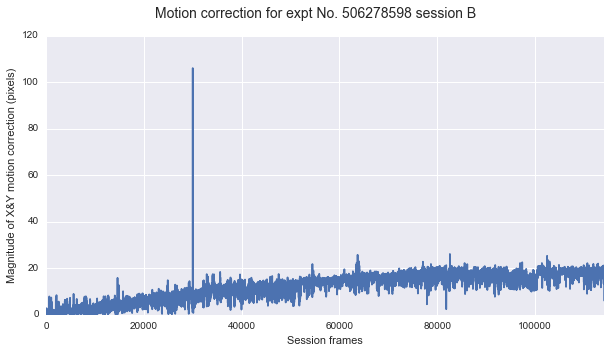

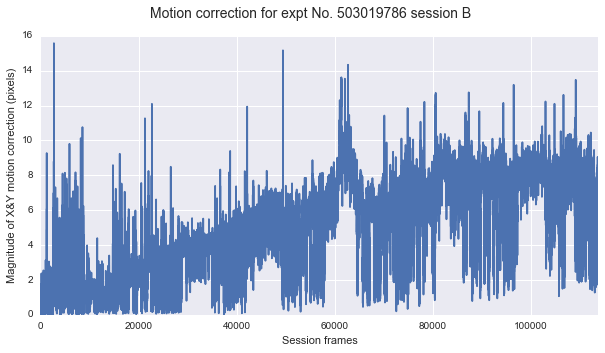

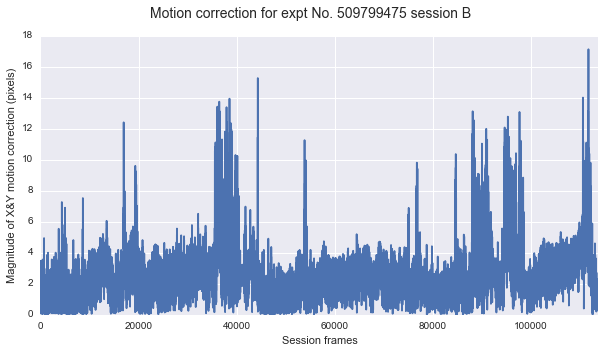

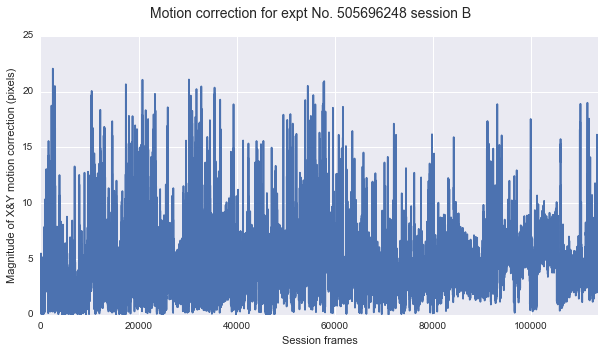

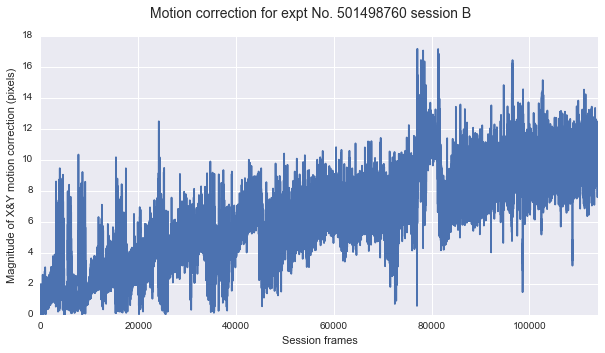

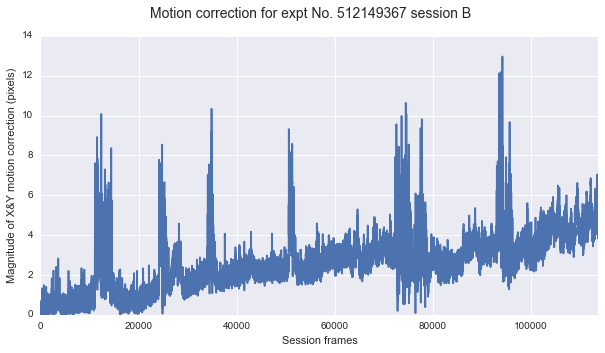

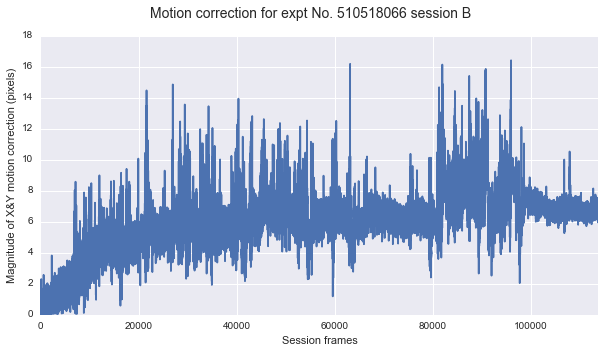

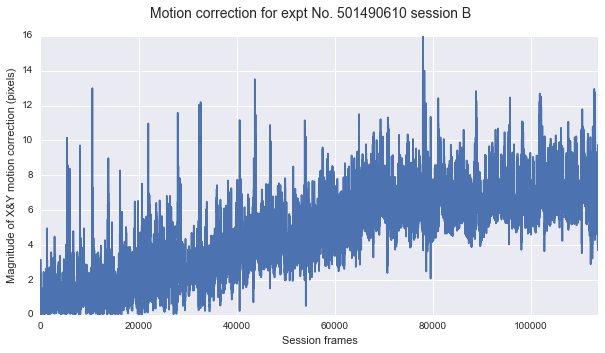

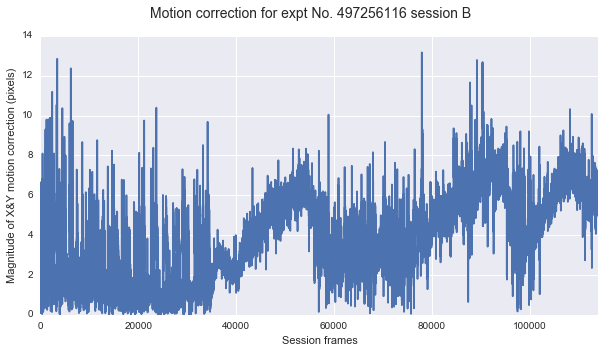

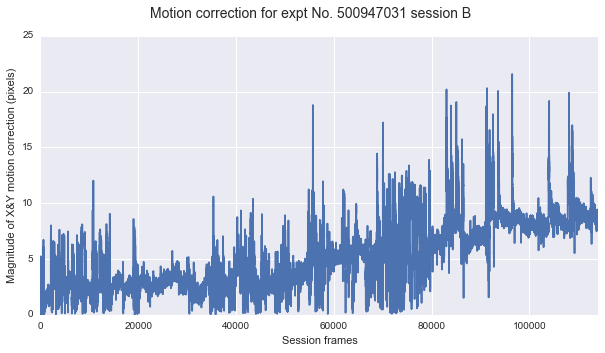

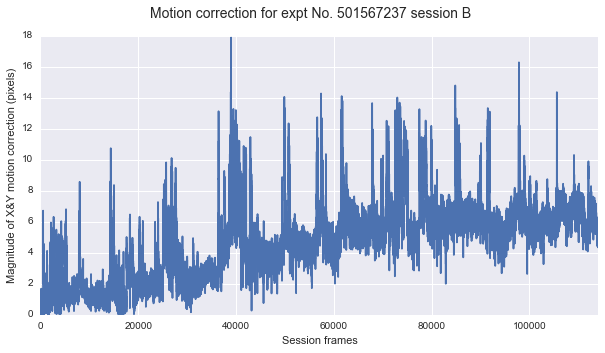

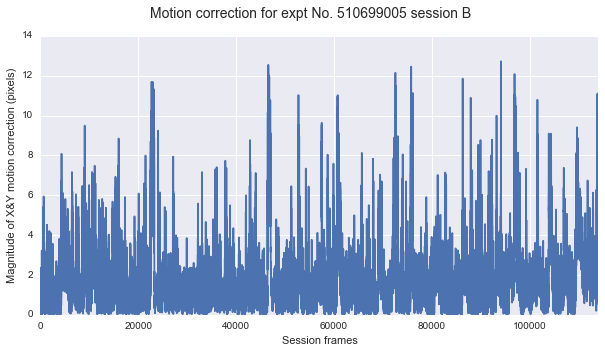

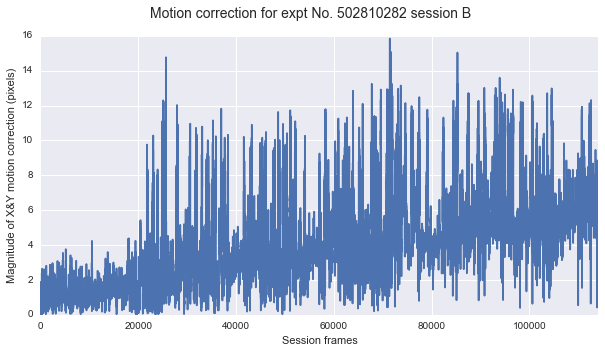

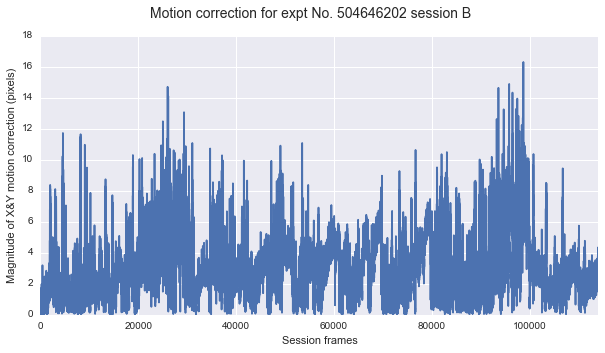

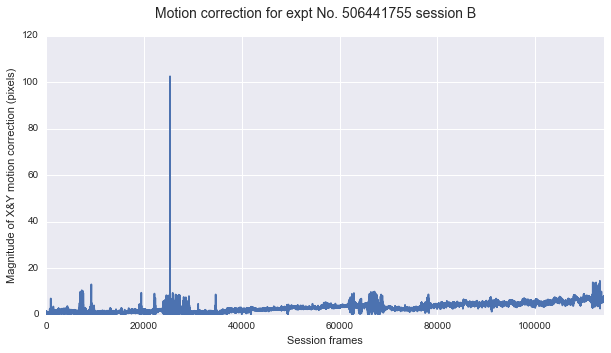

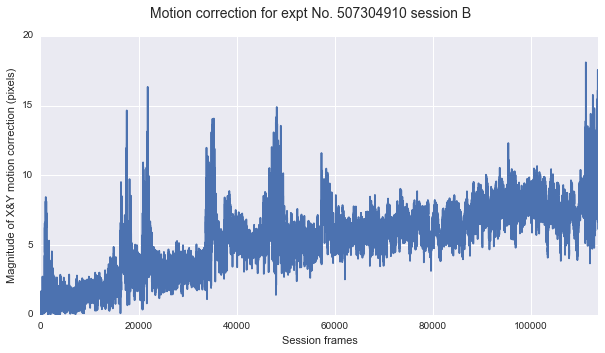

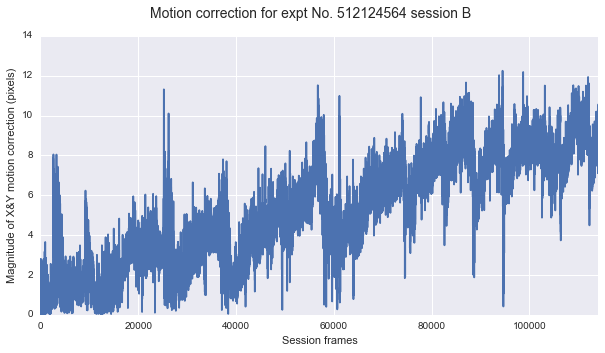

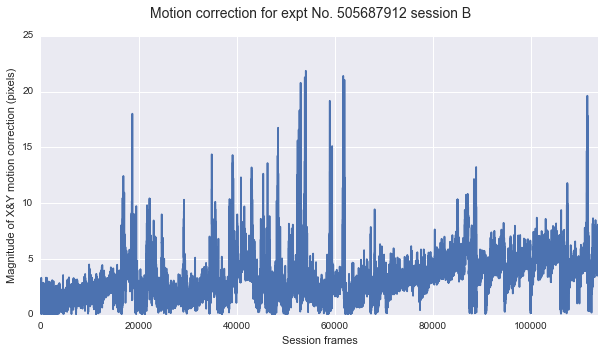

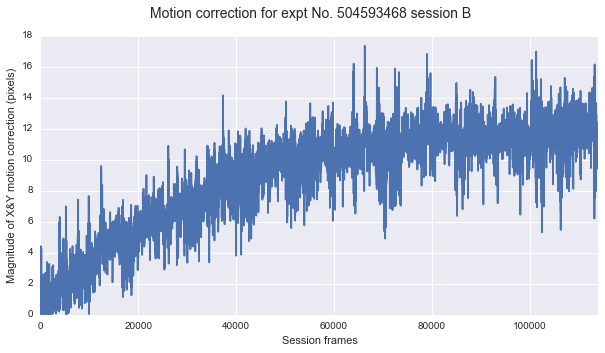

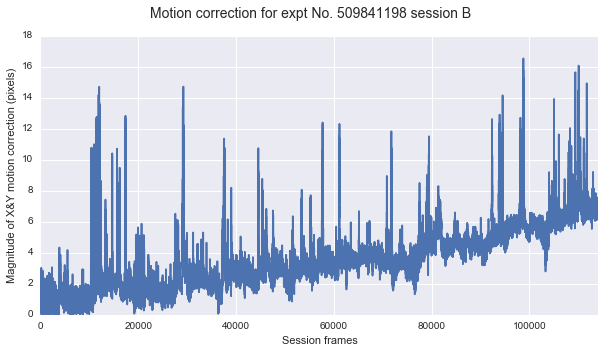

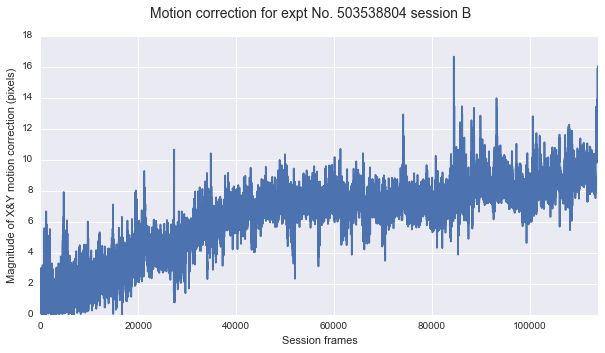

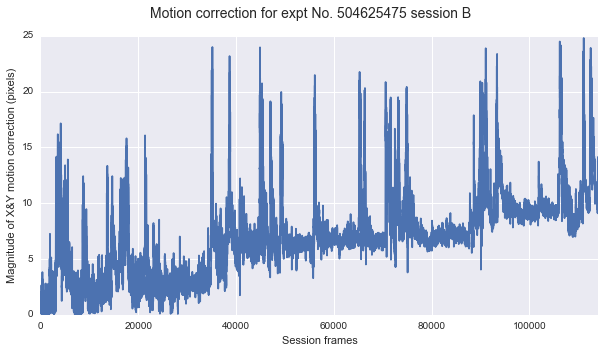

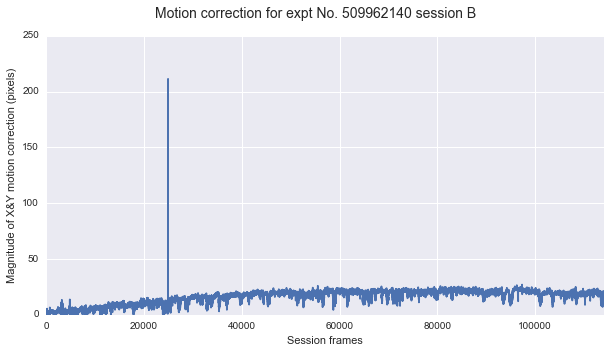

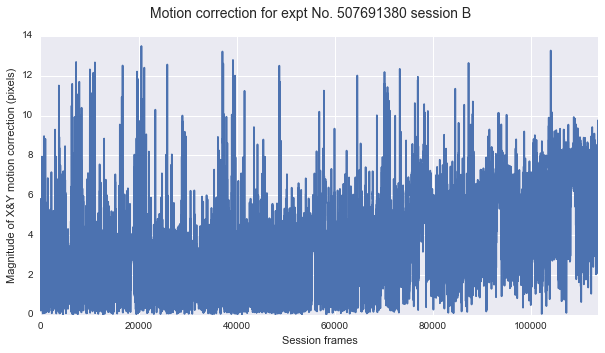

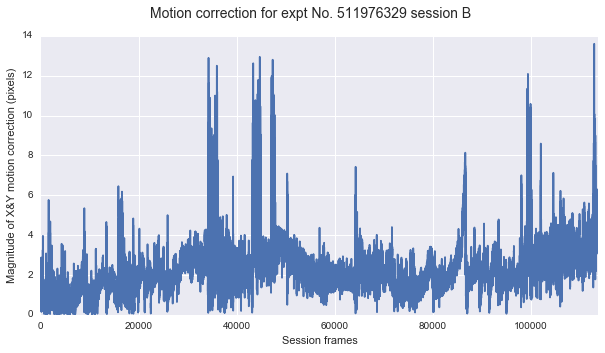

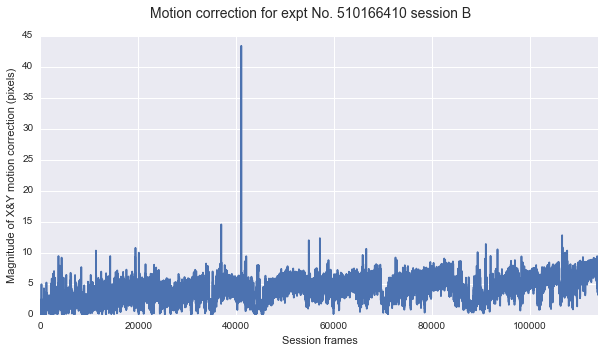

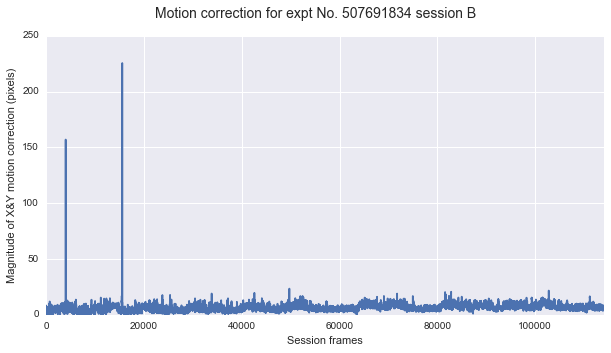

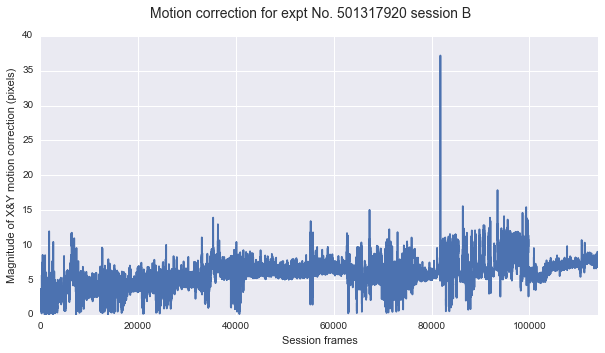

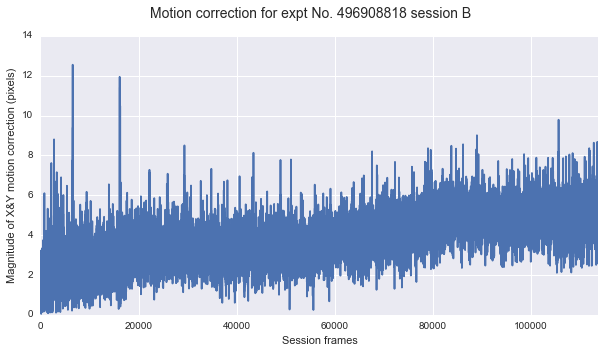

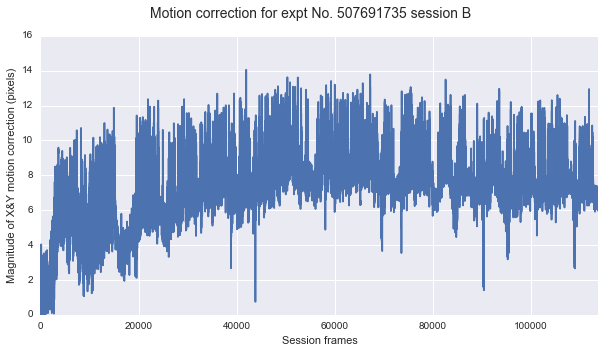

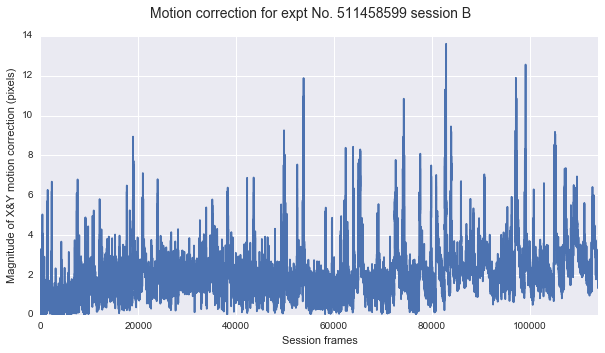

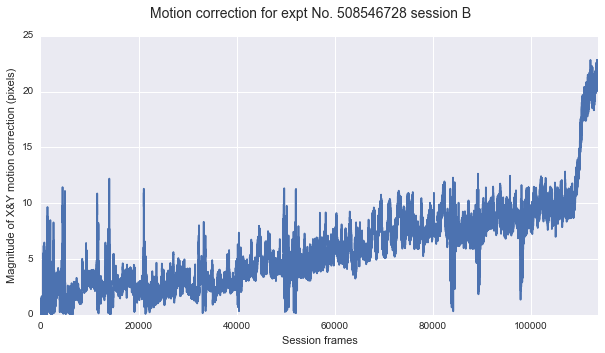

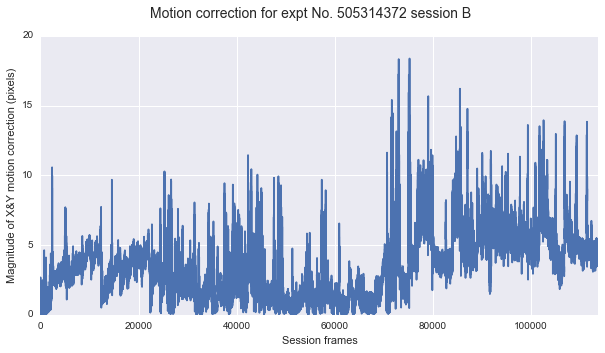

In [17]:
# Plotting motion for all 33 subsetted experiments, and saving each output as PDFs

depthSess = '275_SessB'
dirName = 'exp%s' % (depthSess)

if not os.path.isdir(dirName):
    os.makedirs(dirName)
    
for i in range(allExptMotion_df.shape[0]):
    fig, axes = plt.subplots(figsize=(10, 5))
    axes.set_xlabel('Session frames')
    axes.set_ylabel('Magnitude of X&Y motion correction (pixels)')
    axes.set_xlim(left=0, right=len(allExptMotion[i]))
    axes.plot(allExptMotion[i])
    fig.suptitle('Motion correction for expt No. %d session B' % (ExptMetaData_275_B.id.iloc[i]), fontsize=14)
       

    filename = 'expt_%d_plot' % (ExptMetaData_275_B.id.iloc[i])
    plt.savefig(dirName + '/' + filename, dpi=600)

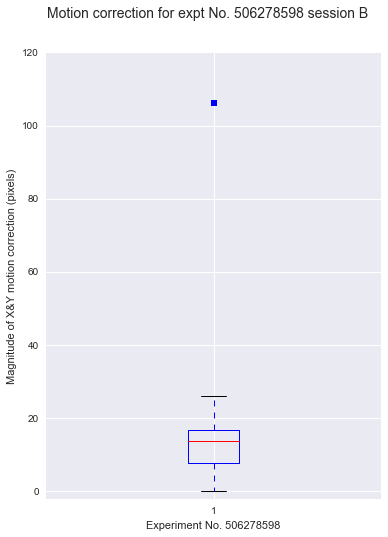

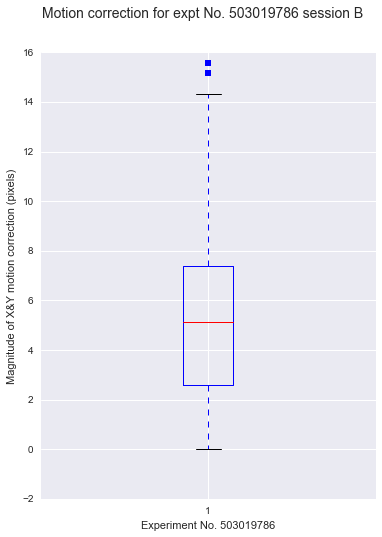

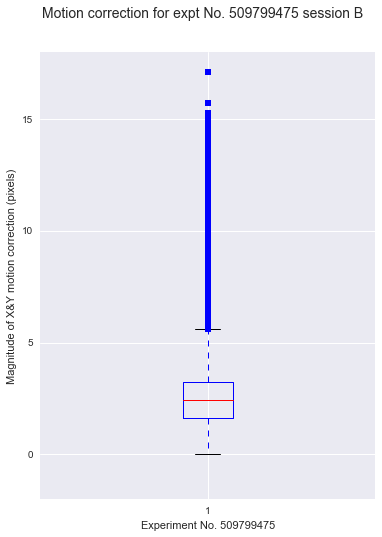

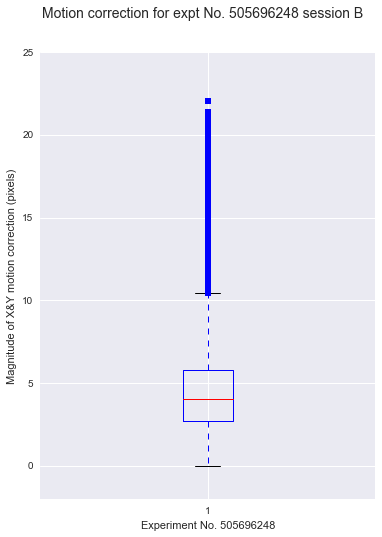

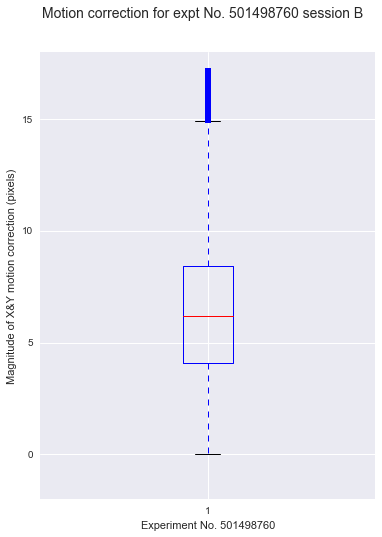

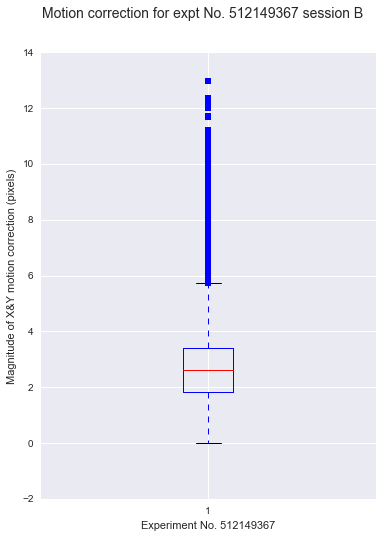

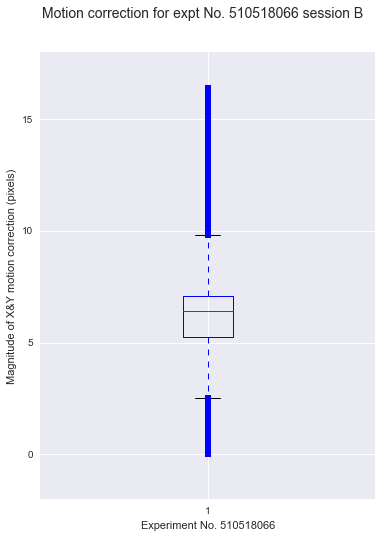

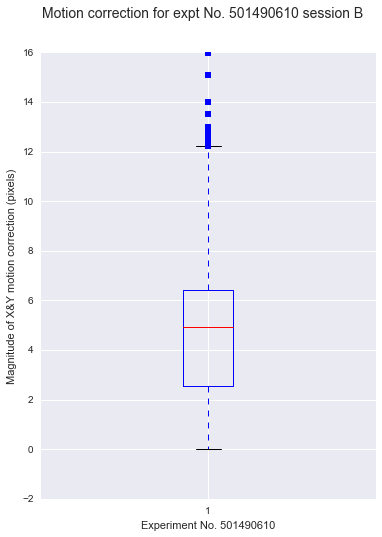

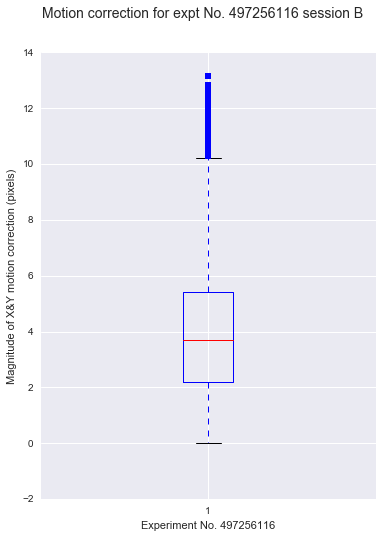

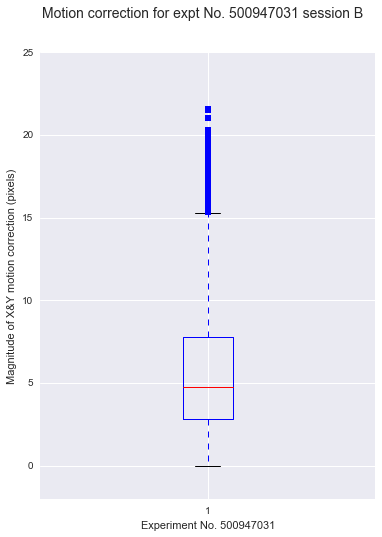

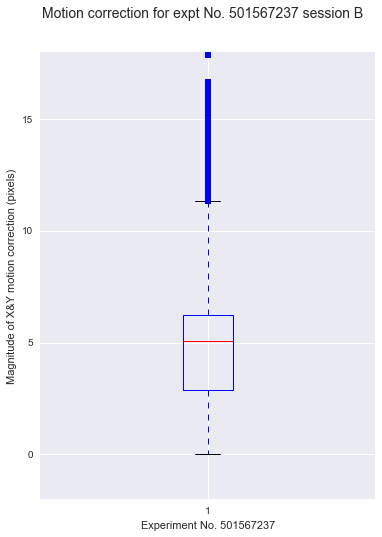

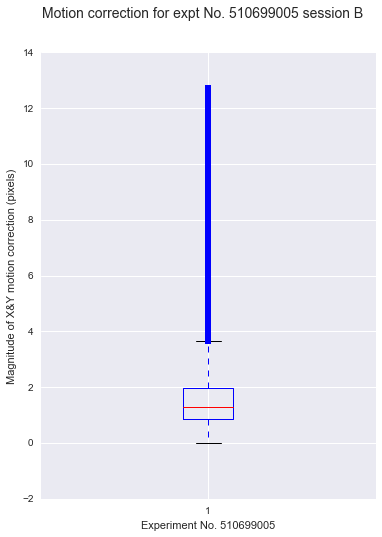

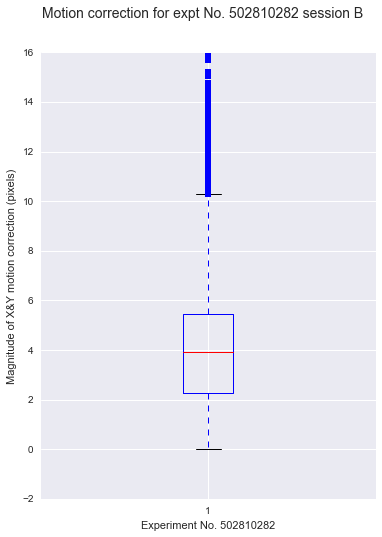

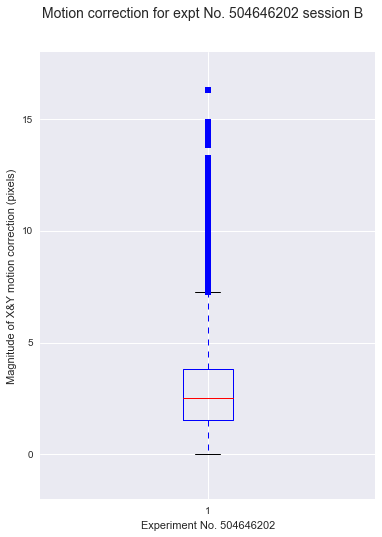

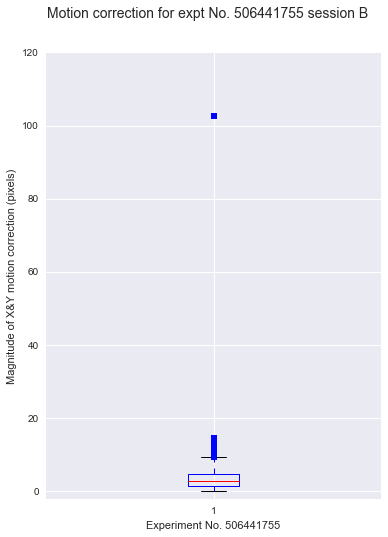

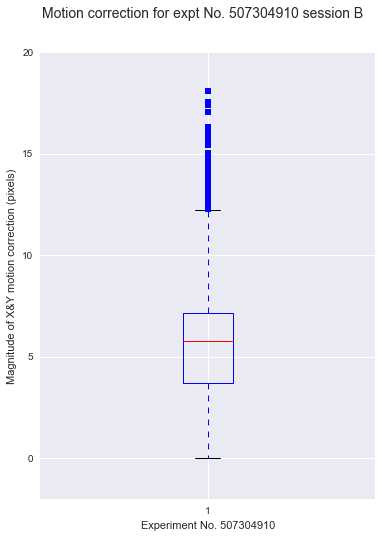

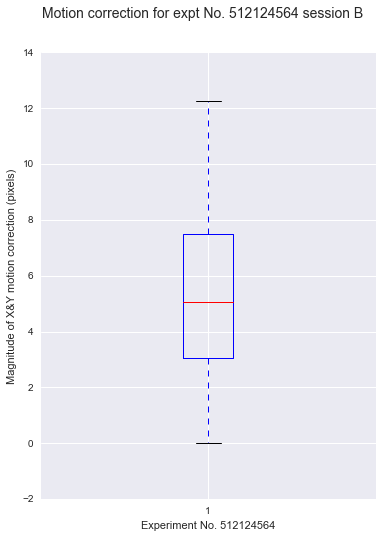

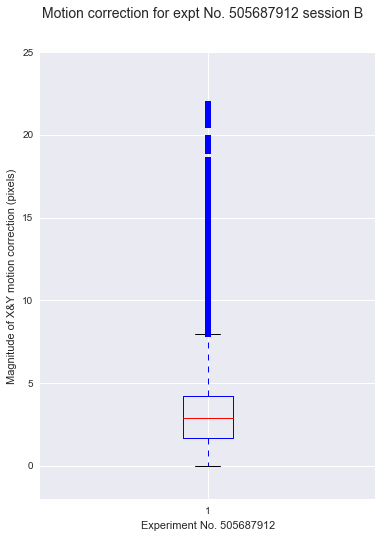

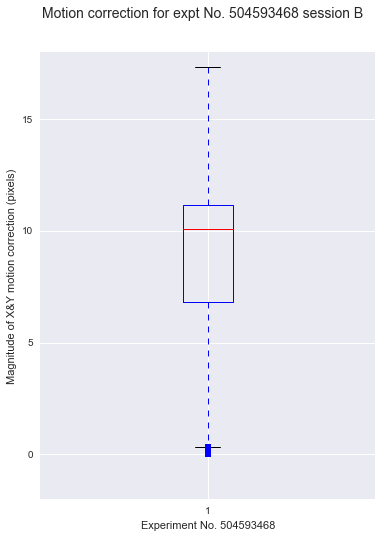

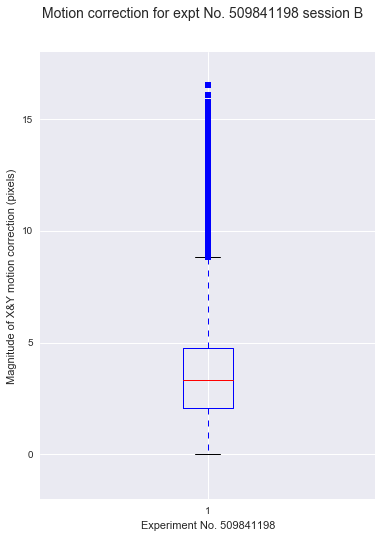

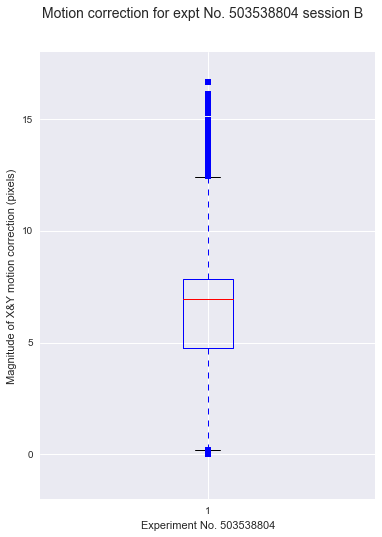

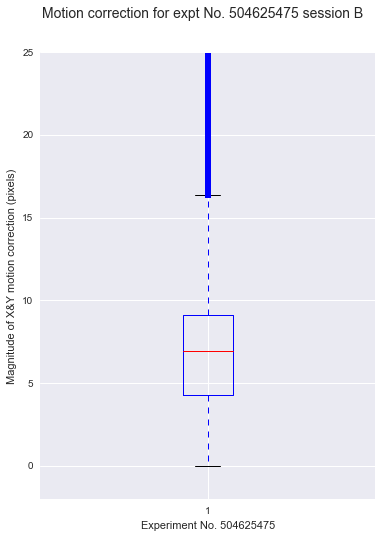

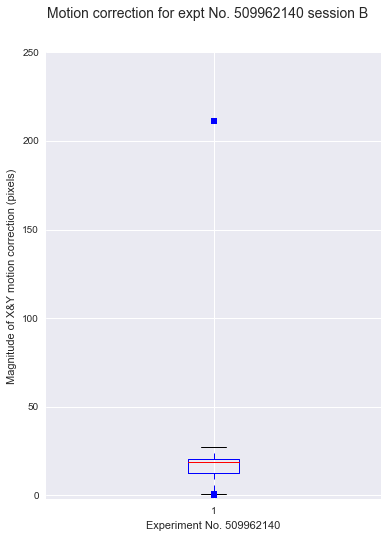

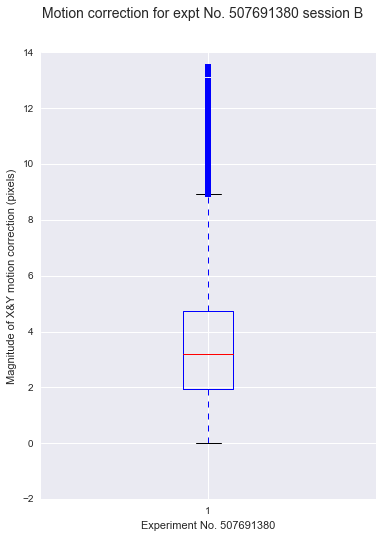

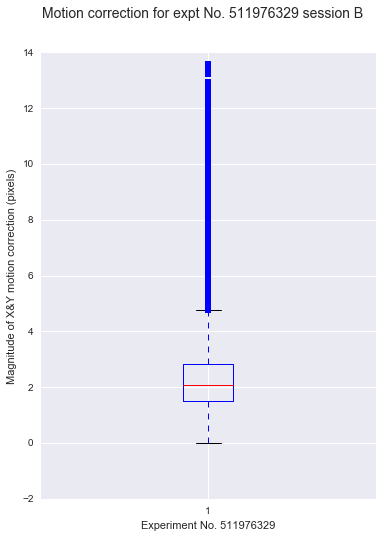

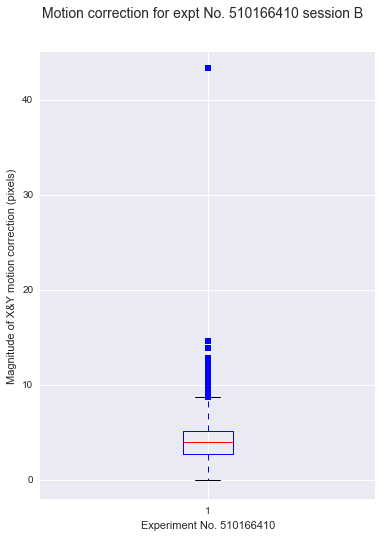

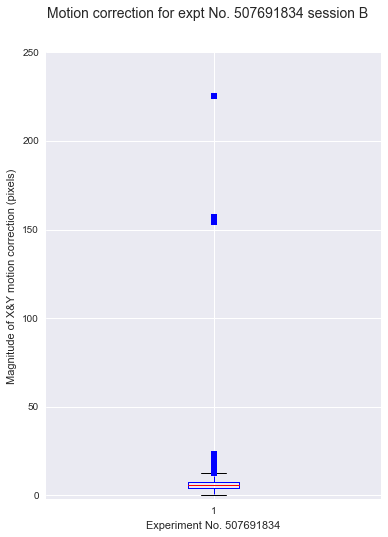

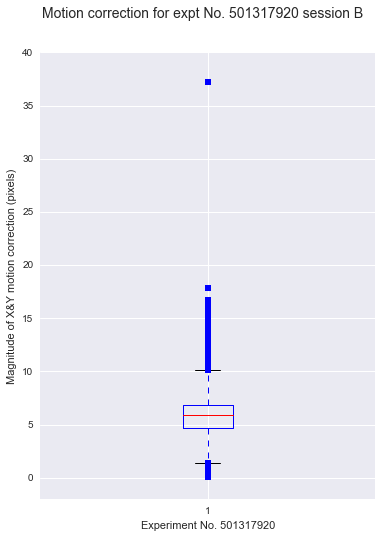

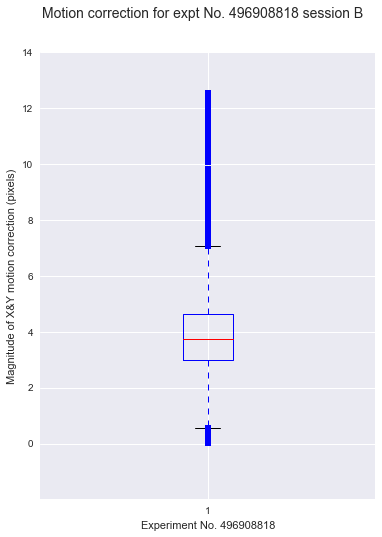

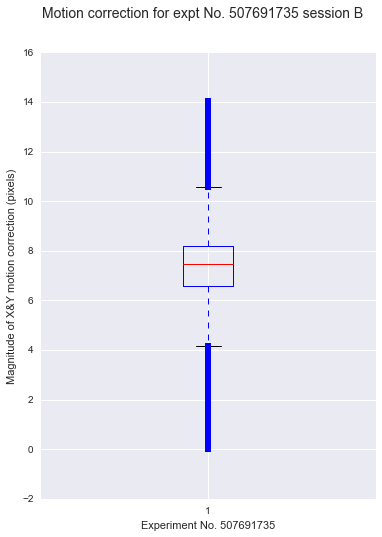

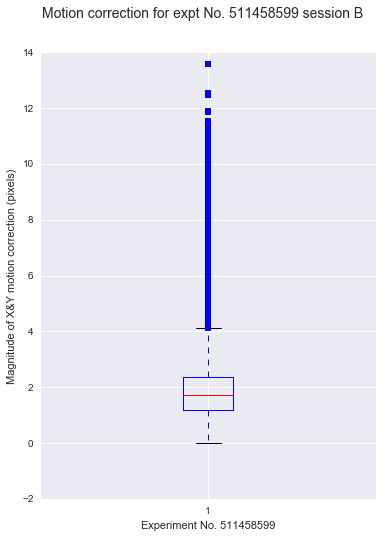

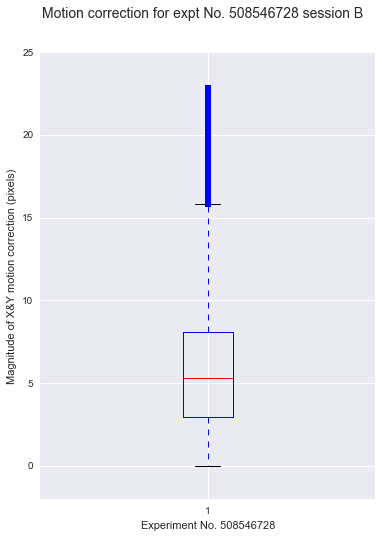

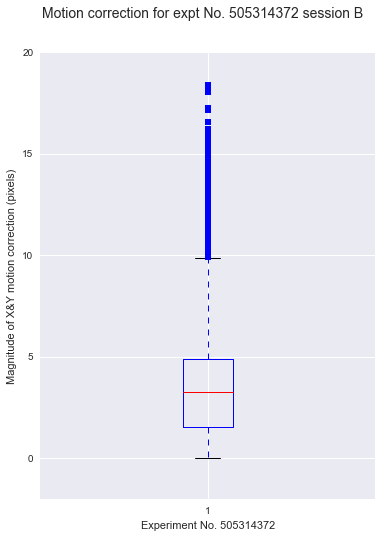

In [18]:
depthSess = '275_SessB'
dirName = 'exp%s' % (depthSess)

if not os.path.isdir(dirName):
    os.makedirs(dirName)
    
for i in range(allExptMotion_df.shape[0]):
    fig, axes = plt.subplots(figsize=(6,8))
    plt.boxplot(allExptMotion[i], 0, 'rs', meanline=True)
    axes.set_ylim(bottom=allExptMotion[i].min()-2)
    axes.set_xlabel('Experiment No. %s' % (ExptMetaData_275_B.id.iloc[i]))
    axes.set_ylabel('Magnitude of X&Y motion correction (pixels)')
    fig.suptitle('Motion correction for expt No. %d session B' % (ExptMetaData_275_B.id.iloc[i]), fontsize=14)
       

    filename = 'expt_%d_boxplot' % (ExptMetaData_275_B.id.iloc[i])
    plt.savefig(dirName + '/' + filename, dpi=600)

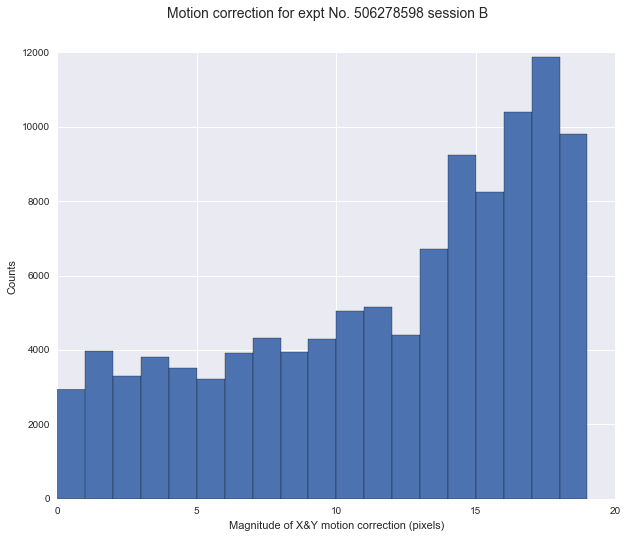

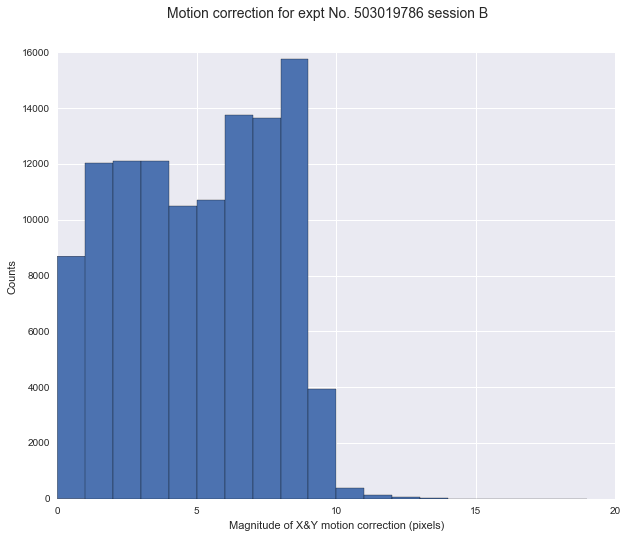

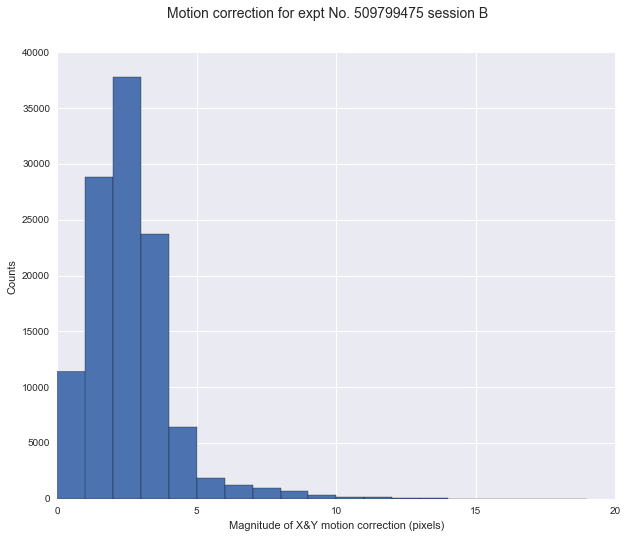

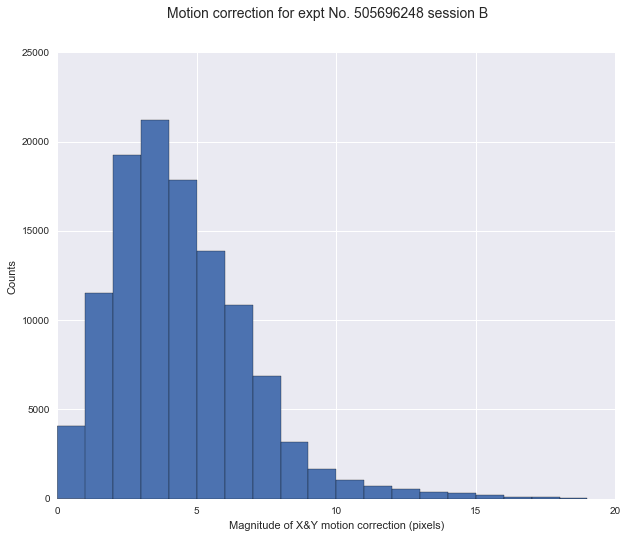

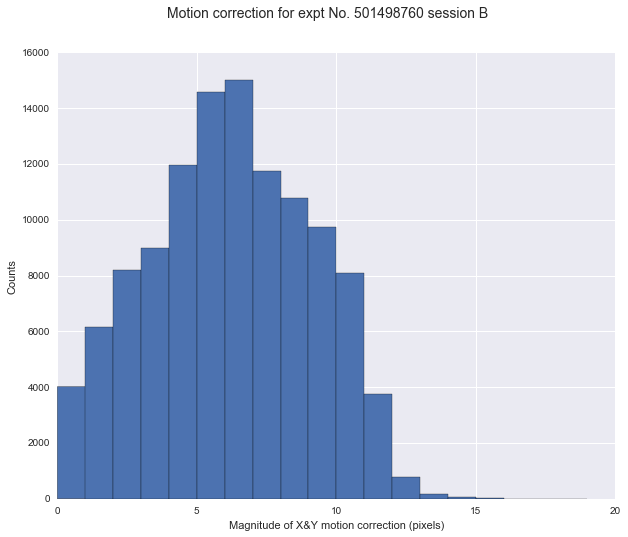

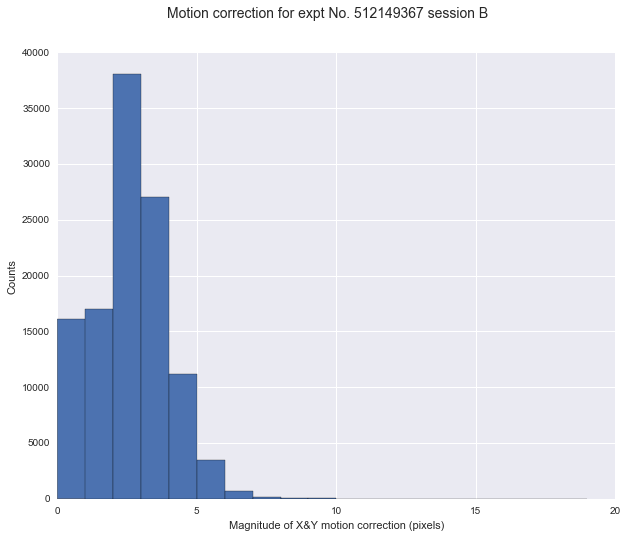

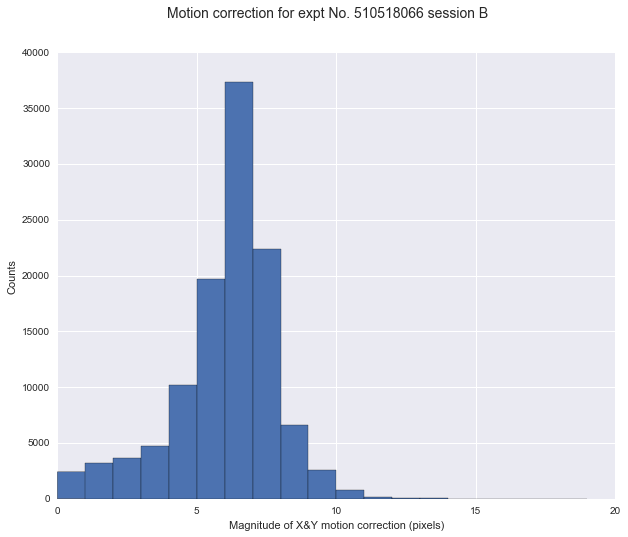

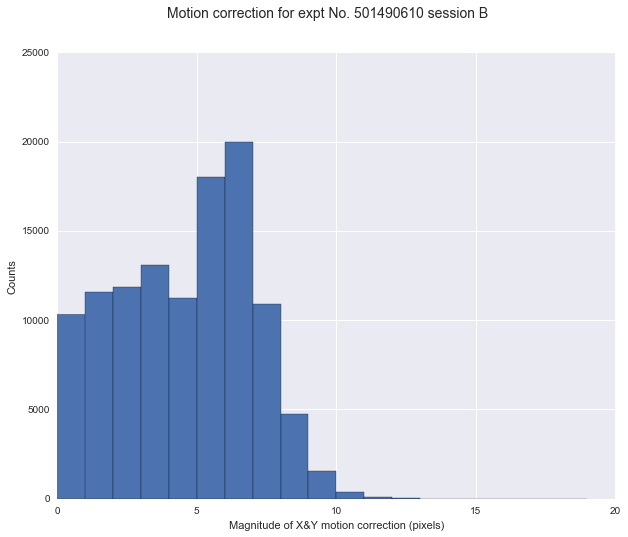

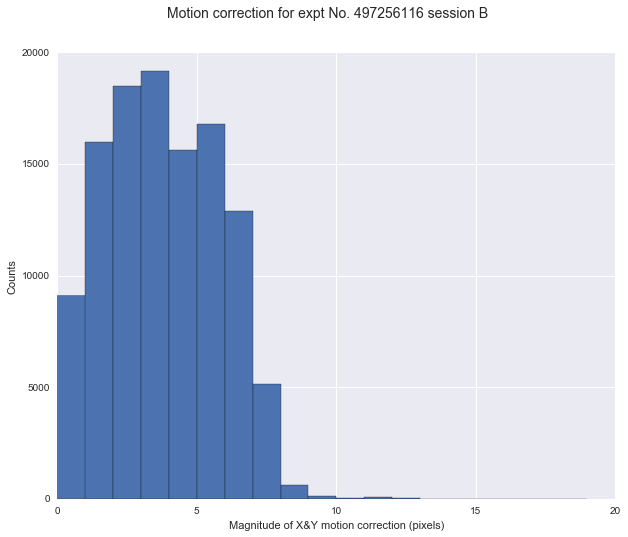

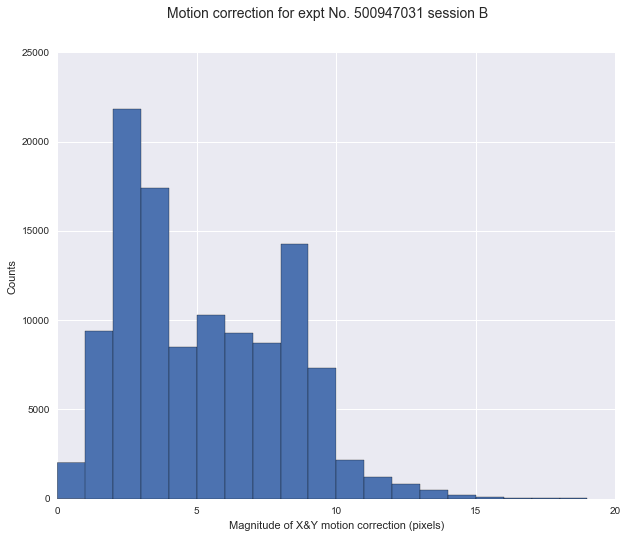

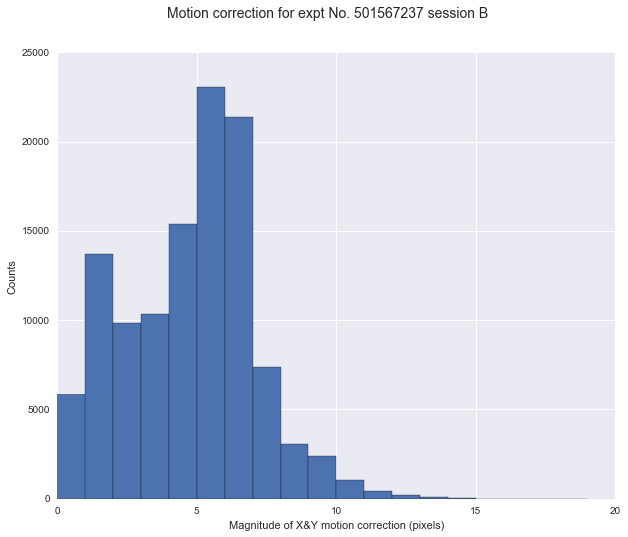

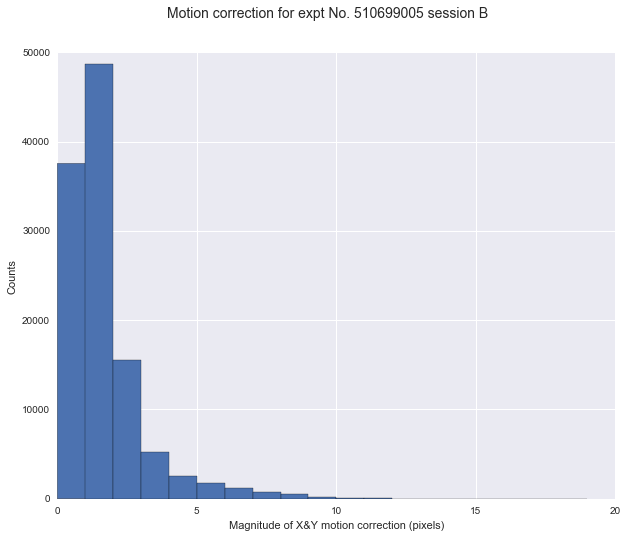

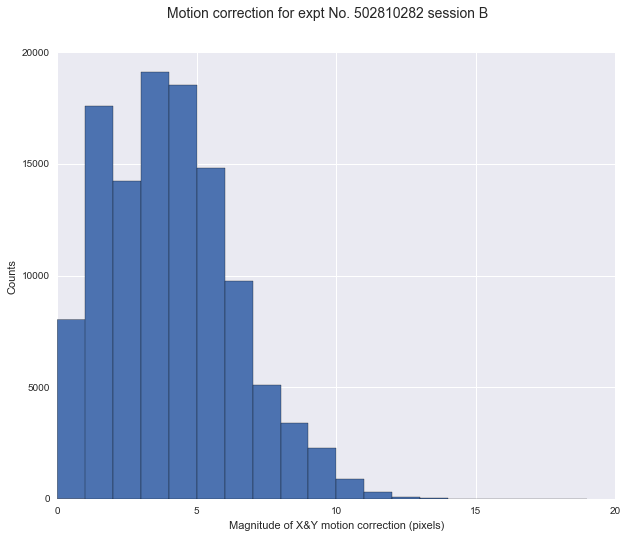

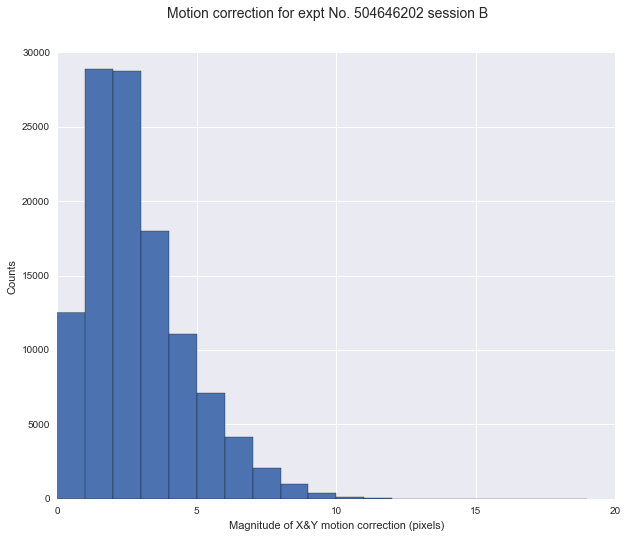

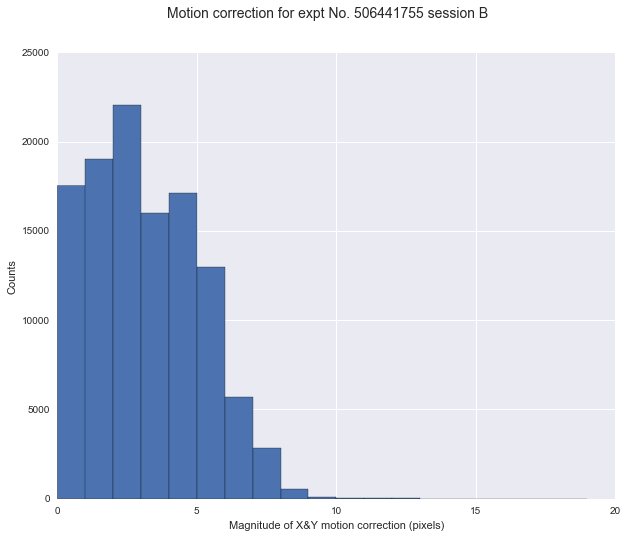

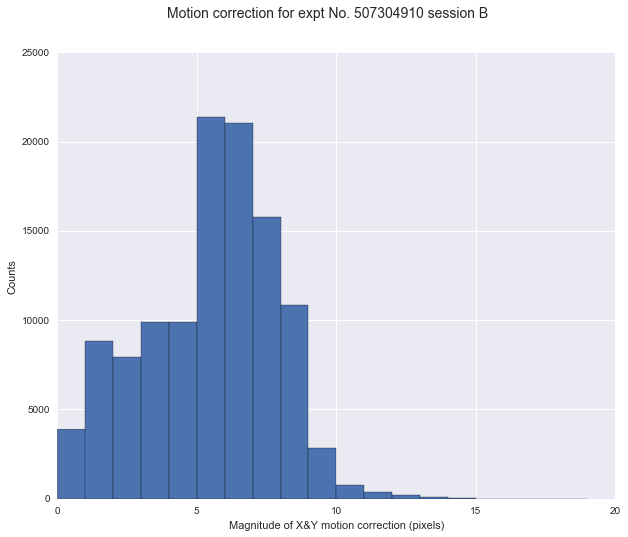

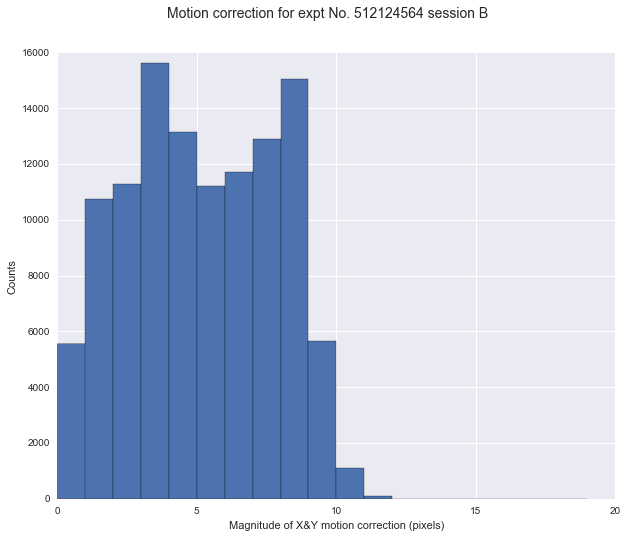

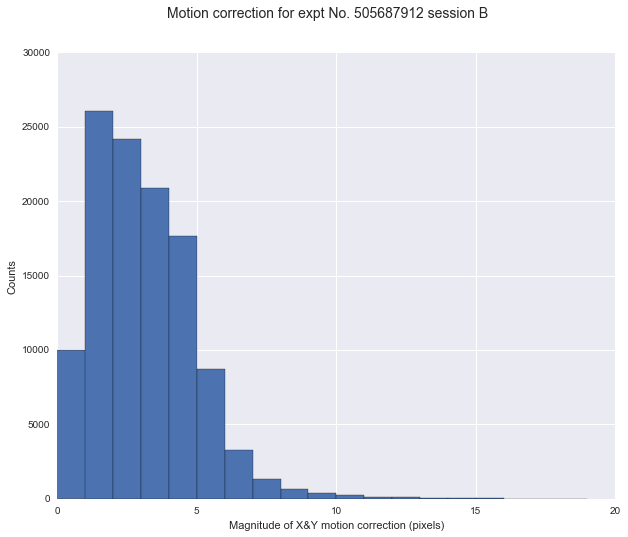

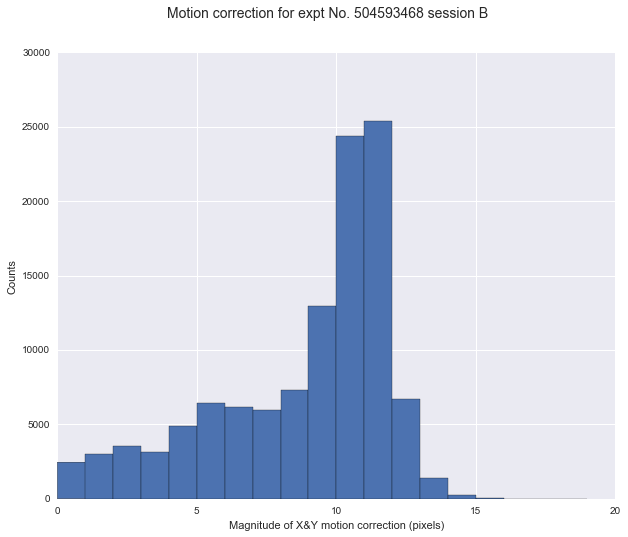

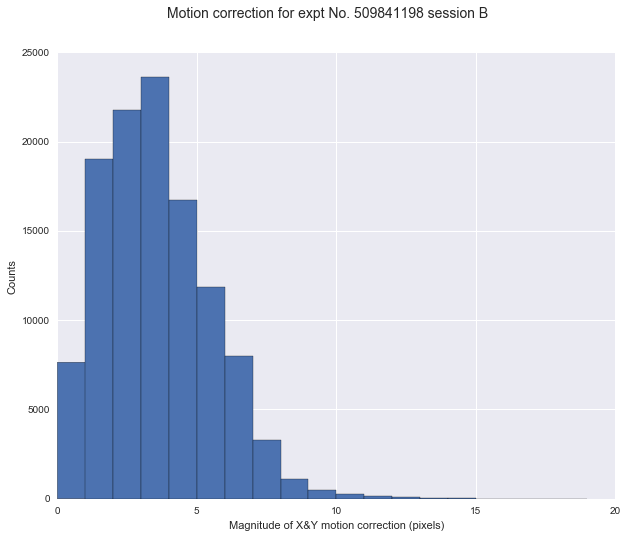

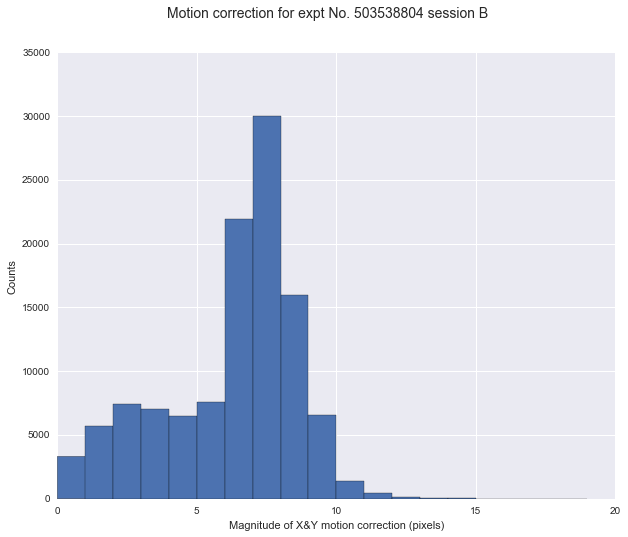

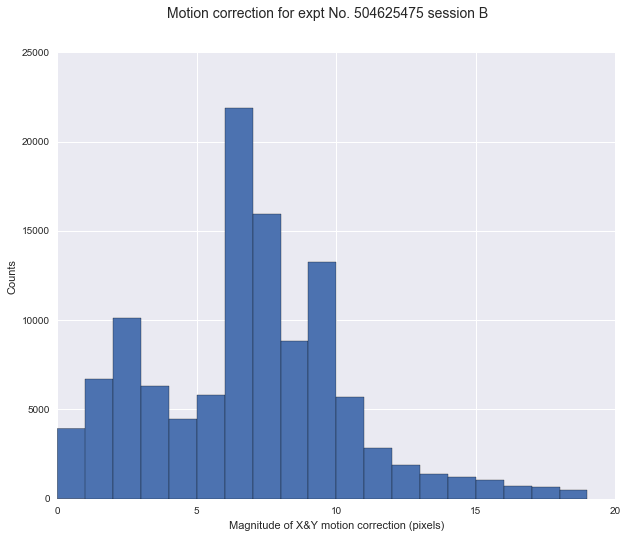

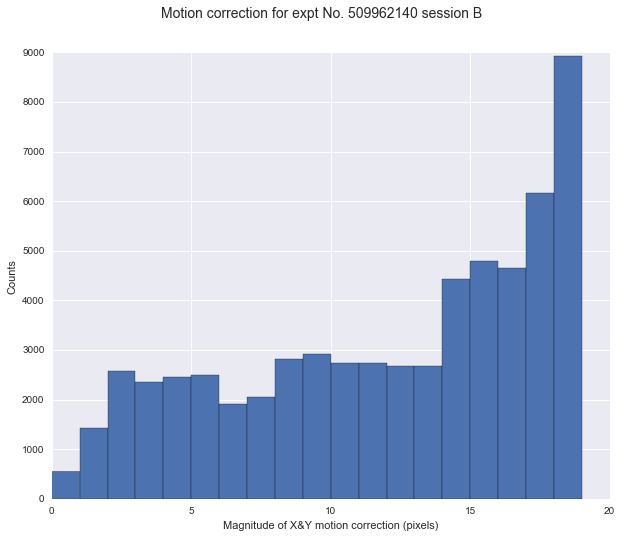

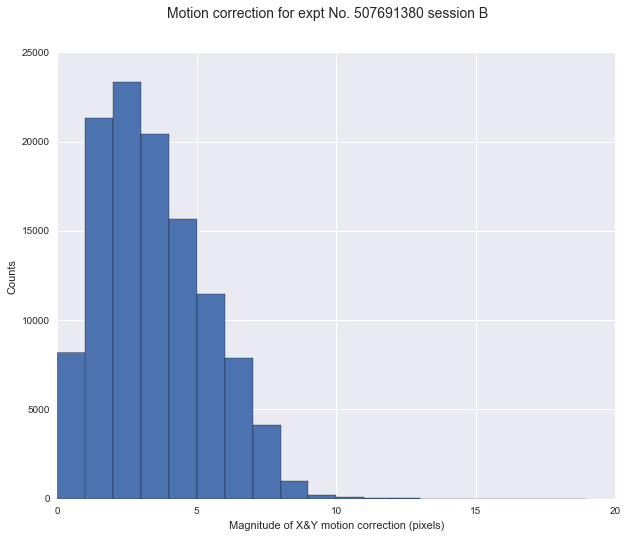

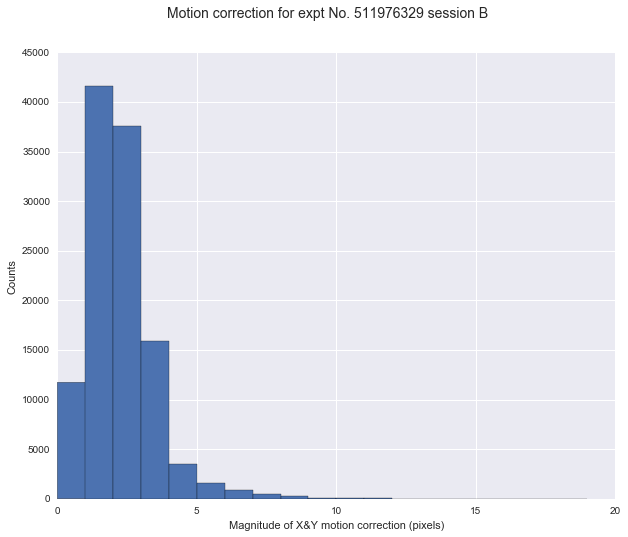

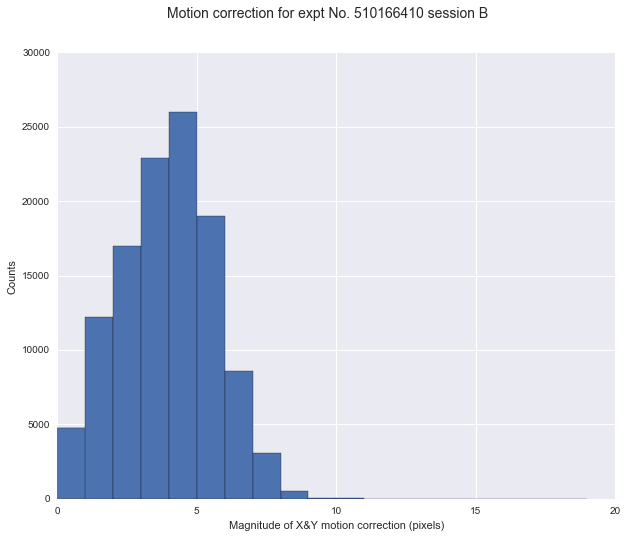

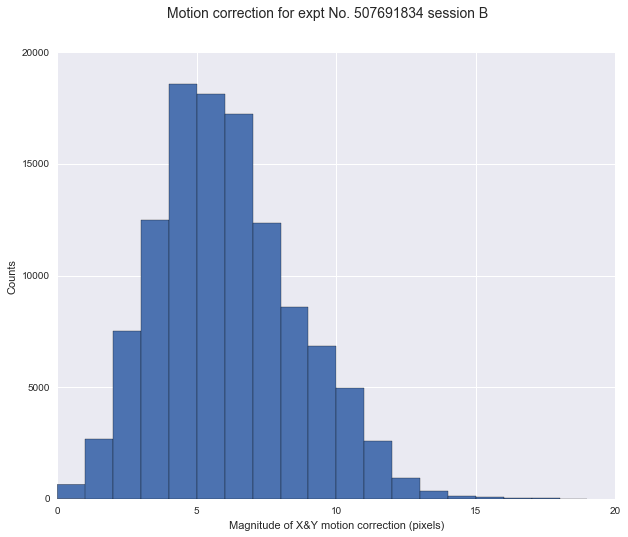

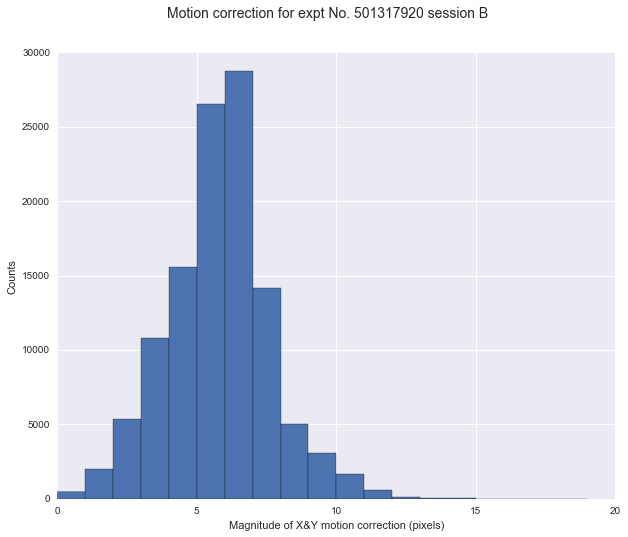

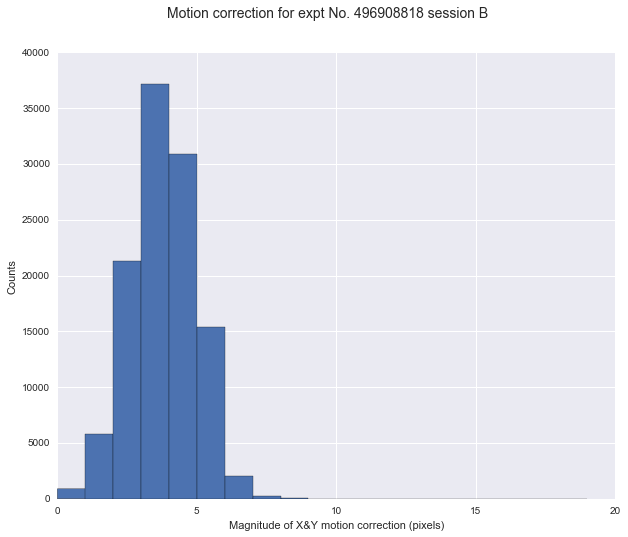

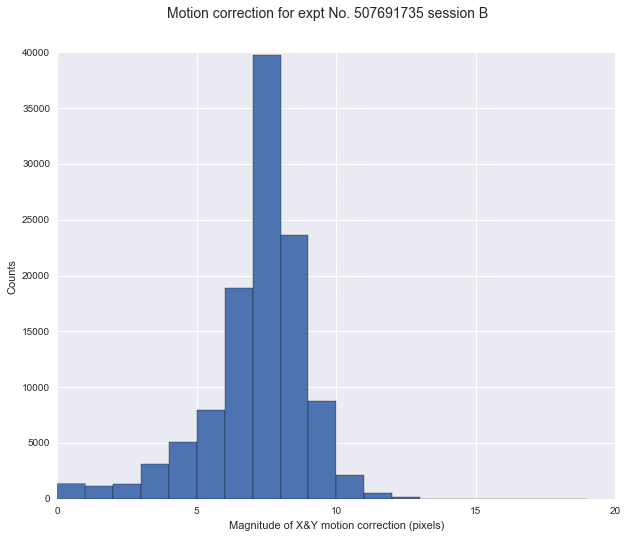

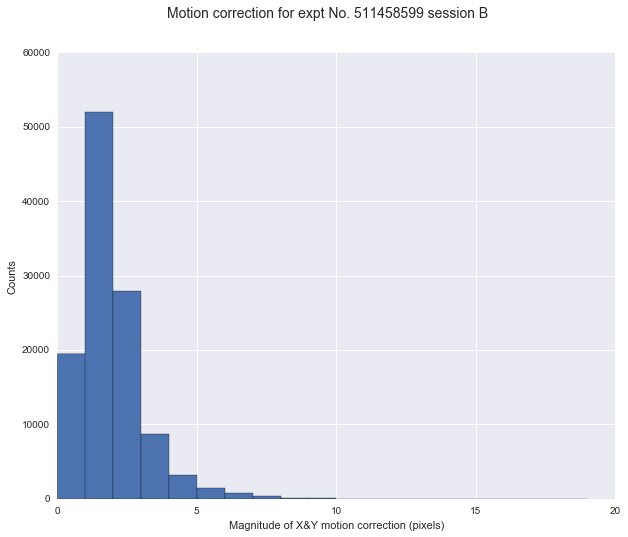

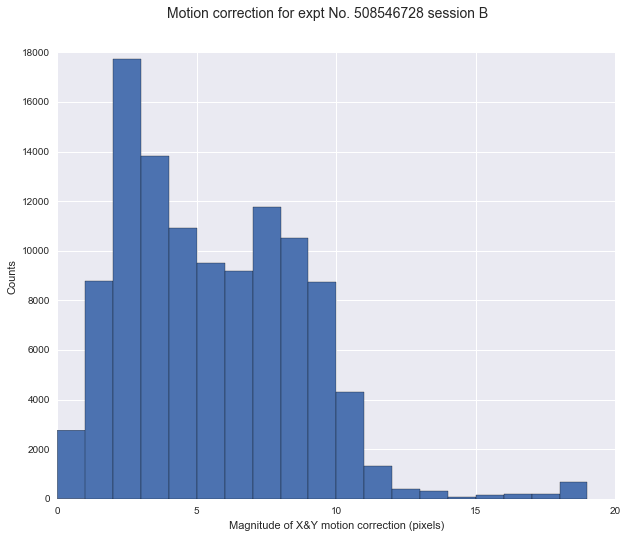

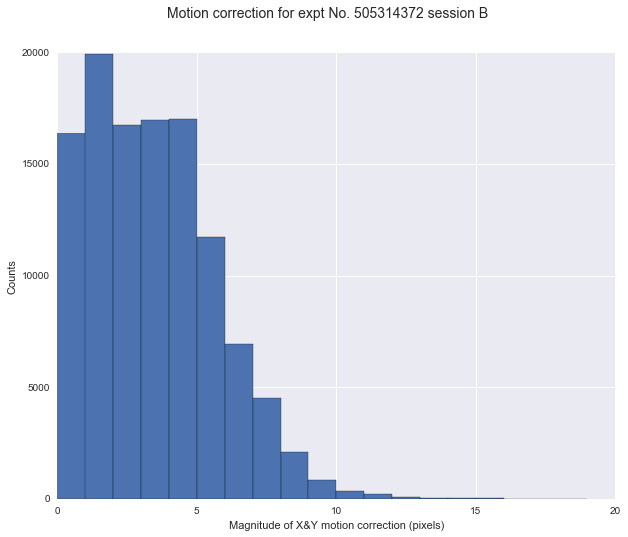

In [19]:
depthSess = '275_SessB'
dirName = 'exp%s' % (depthSess)

if not os.path.isdir(dirName):
    os.makedirs(dirName)
    
for i in range(allExptMotion_df.shape[0]):
    fig, axes = plt.subplots(figsize=(10,8))
    plt.hist(allExptMotion[i], bins=np.arange(20))
    axes.set_xlabel('Magnitude of X&Y motion correction (pixels)' % (ExptMetaData_275_B.id.iloc[i]))
    axes.set_ylabel('Counts')
    fig.suptitle('Motion correction for expt No. %d session B' % (ExptMetaData_275_B.id.iloc[i]), fontsize=14)
       

    filename = 'expt_%d_histograpm' % (ExptMetaData_275_B.id.iloc[i])
    plt.savefig(dirName + '/' + filename, dpi=600)

In [40]:
# Defining functions to get intensity values averaged over sweep response (trial). This modified version of the 
# AllenSDK script computes motion using the motion_trace object

def get_sweep_response_motion(ns_data, motion_trace):
        """ Calculates the response to each sweep in the stimulus table for each cell and the mean response.
        The return is a 3-tuple of:

            * sweep_response: pd.DataFrame of response dF/F traces organized by cell (column) and sweep (row)

            * mean_sweep_response: mean values of the traces returned in sweep_response

            * pval: p value from 1-way ANOVA comparing response during sweep to response prior to sweep

        Returns
        -------
        3-tuple: sweep_response, mean_sweep_response, pval
        """
        def do_mean(x):
            # +1])
            return np.mean(x[ns_data.interlength:ns_data.interlength + ns_data.sweeplength + ns_data.extralength])

        def do_p_value(x):
            (_, p) = st.f_oneway(x[:ns_data.interlength], x[
                ns_data.interlength:ns_data.interlength + ns_data.sweeplength + ns_data.extralength])
            return p

       # StimulusAnalysis._log.info('Calculating responses for each sweep')
        sweep_response = pd.DataFrame(index=ns_data.stim_table.index.values, columns=np.array(
            range(ns_data.numbercells + 2)).astype(str))
        sweep_response.rename(columns={str(ns_data.numbercells): 'dx'}, inplace=True)
        sweep_response.rename(columns={str(ns_data.numbercells+1): 'mx'}, inplace=True)
        for index, row in ns_data.stim_table.iterrows():
            start = row['start'] - ns_data.interlength
            end = row['start'] + ns_data.sweeplength + ns_data.interlength

            for nc in range(ns_data.numbercells):
                temp = ns_data.celltraces[nc, start:end]
                sweep_response[str(nc)][index] = 100 * \
                    ((temp / np.mean(temp[:ns_data.interlength])) - 1)
            sweep_response['dx'][index] = ns_data.dxcm[start:end]
            sweep_response['mx'][index] = motion_trace[start:end]

        mean_sweep_response = sweep_response.applymap(do_mean)

        #pval = sweep_response.applymap(do_p_value)
        return sweep_response, mean_sweep_response #, pval 
            # NOTE: Returning a 2-tuple instead of 3, as mentioned above. Ran into issues when calculating ANOVA p-val


In [1]:
# Caching natural scences data... It's a lot :) Bad idea. Must change later.
naturalSceneCache = {}
def get_natural_scene(exptID):
    if exptID in naturalSceneCache:
        return naturalSceneCache[exptID]
    tempExptData = boc.get_ophys_experiment_data(exptID)
    tempNatScenesData = NaturalScenes(tempExptData)
    naturalSceneCache[exptID] = tempNatScenesData
    return tempNatScenesData

def get_corr_from_expt(exptID): 
    
    """ Correlates corrected fluorescence trace and motion correction on a per cell, per trial basis .
    The return is dictionary:

        * key: experiment number
        * entries: correlation between each cell and motion correction values. 

        * IMPORTANT: function depends on having imported BrainObservatoryCache as BOC
        and NaturalScenes from BrainObservatoryCache!!!!!!

    Returns
    -------
    A dictionary where the 'key' is experiment number and entries are the correlation values and prints
    results for each cell
    """

    tempExptData = boc.get_ophys_experiment_data(exptID)

    tempNatScenesData = get_natural_scene(exptID)

    exptINDEX = np.where(ExptMetaData_275_B.id == exptID)[0][0]

    tempMotionTrace = allExptMotion_df.iloc[exptINDEX].values

    sweep_response, mean_sweep_response = get_sweep_response_motion(tempNatScenesData, tempMotionTrace)

    # Correlations for motion correction and corrected fluorescence trace
    num_cells=len(mean_sweep_response.iloc[0])-2
    corr_arr = np.zeros(num_cells)
    corr_arr = []
    for i in range(num_cells):
        tempCorr = np.corrcoef(mean_sweep_response.iloc[:,-1].values, mean_sweep_response.iloc[:,i].values)[0,1]
        corr_arr.append(tempCorr)
        print('Correlation coefficient for cell#%d: %f' % (i+1, tempCorr))
    return corr_arr

In [ ]:
# Returns a dictionary where each key in an Expt ID and its values are corr values, as defined in 
# get_corr_from_expt function

allCorrs = {}
for i in ExptMetaData_275_B.id.iloc[1]:
    allCorrs[i] = get_corr_from_expt(i)
print('Max:', allCorrs.max())
print('Min:', allCorrs.min())

# Sandbox (aka mess while I was trying to figure out what I was doing)

In [165]:
Corr_set1 = get_corr_from_expt(ExptMetaData_275_B.id.iloc[21])


Correlation coefficient for cell#1: 0.013982
Correlation coefficient for cell#2: 0.014161
Correlation coefficient for cell#3: 0.018471
Correlation coefficient for cell#4: 0.000513
Correlation coefficient for cell#5: -0.006751
Correlation coefficient for cell#6: 0.005492
Correlation coefficient for cell#7: 0.003143
Correlation coefficient for cell#8: 0.002219
Correlation coefficient for cell#9: -0.013552
Correlation coefficient for cell#10: 0.007174
Correlation coefficient for cell#11: -0.002560
Correlation coefficient for cell#12: 0.023021
Correlation coefficient for cell#13: 0.056334
Correlation coefficient for cell#14: -0.018212
Correlation coefficient for cell#15: 0.004015
Correlation coefficient for cell#16: -0.010581
Correlation coefficient for cell#17: -0.002488
Correlation coefficient for cell#18: 0.030662
Correlation coefficient for cell#19: 0.004156
Correlation coefficient for cell#20: -0.007684
Correlation coefficient for cell#21: 0.022495
Correlation coefficient for cell#22:

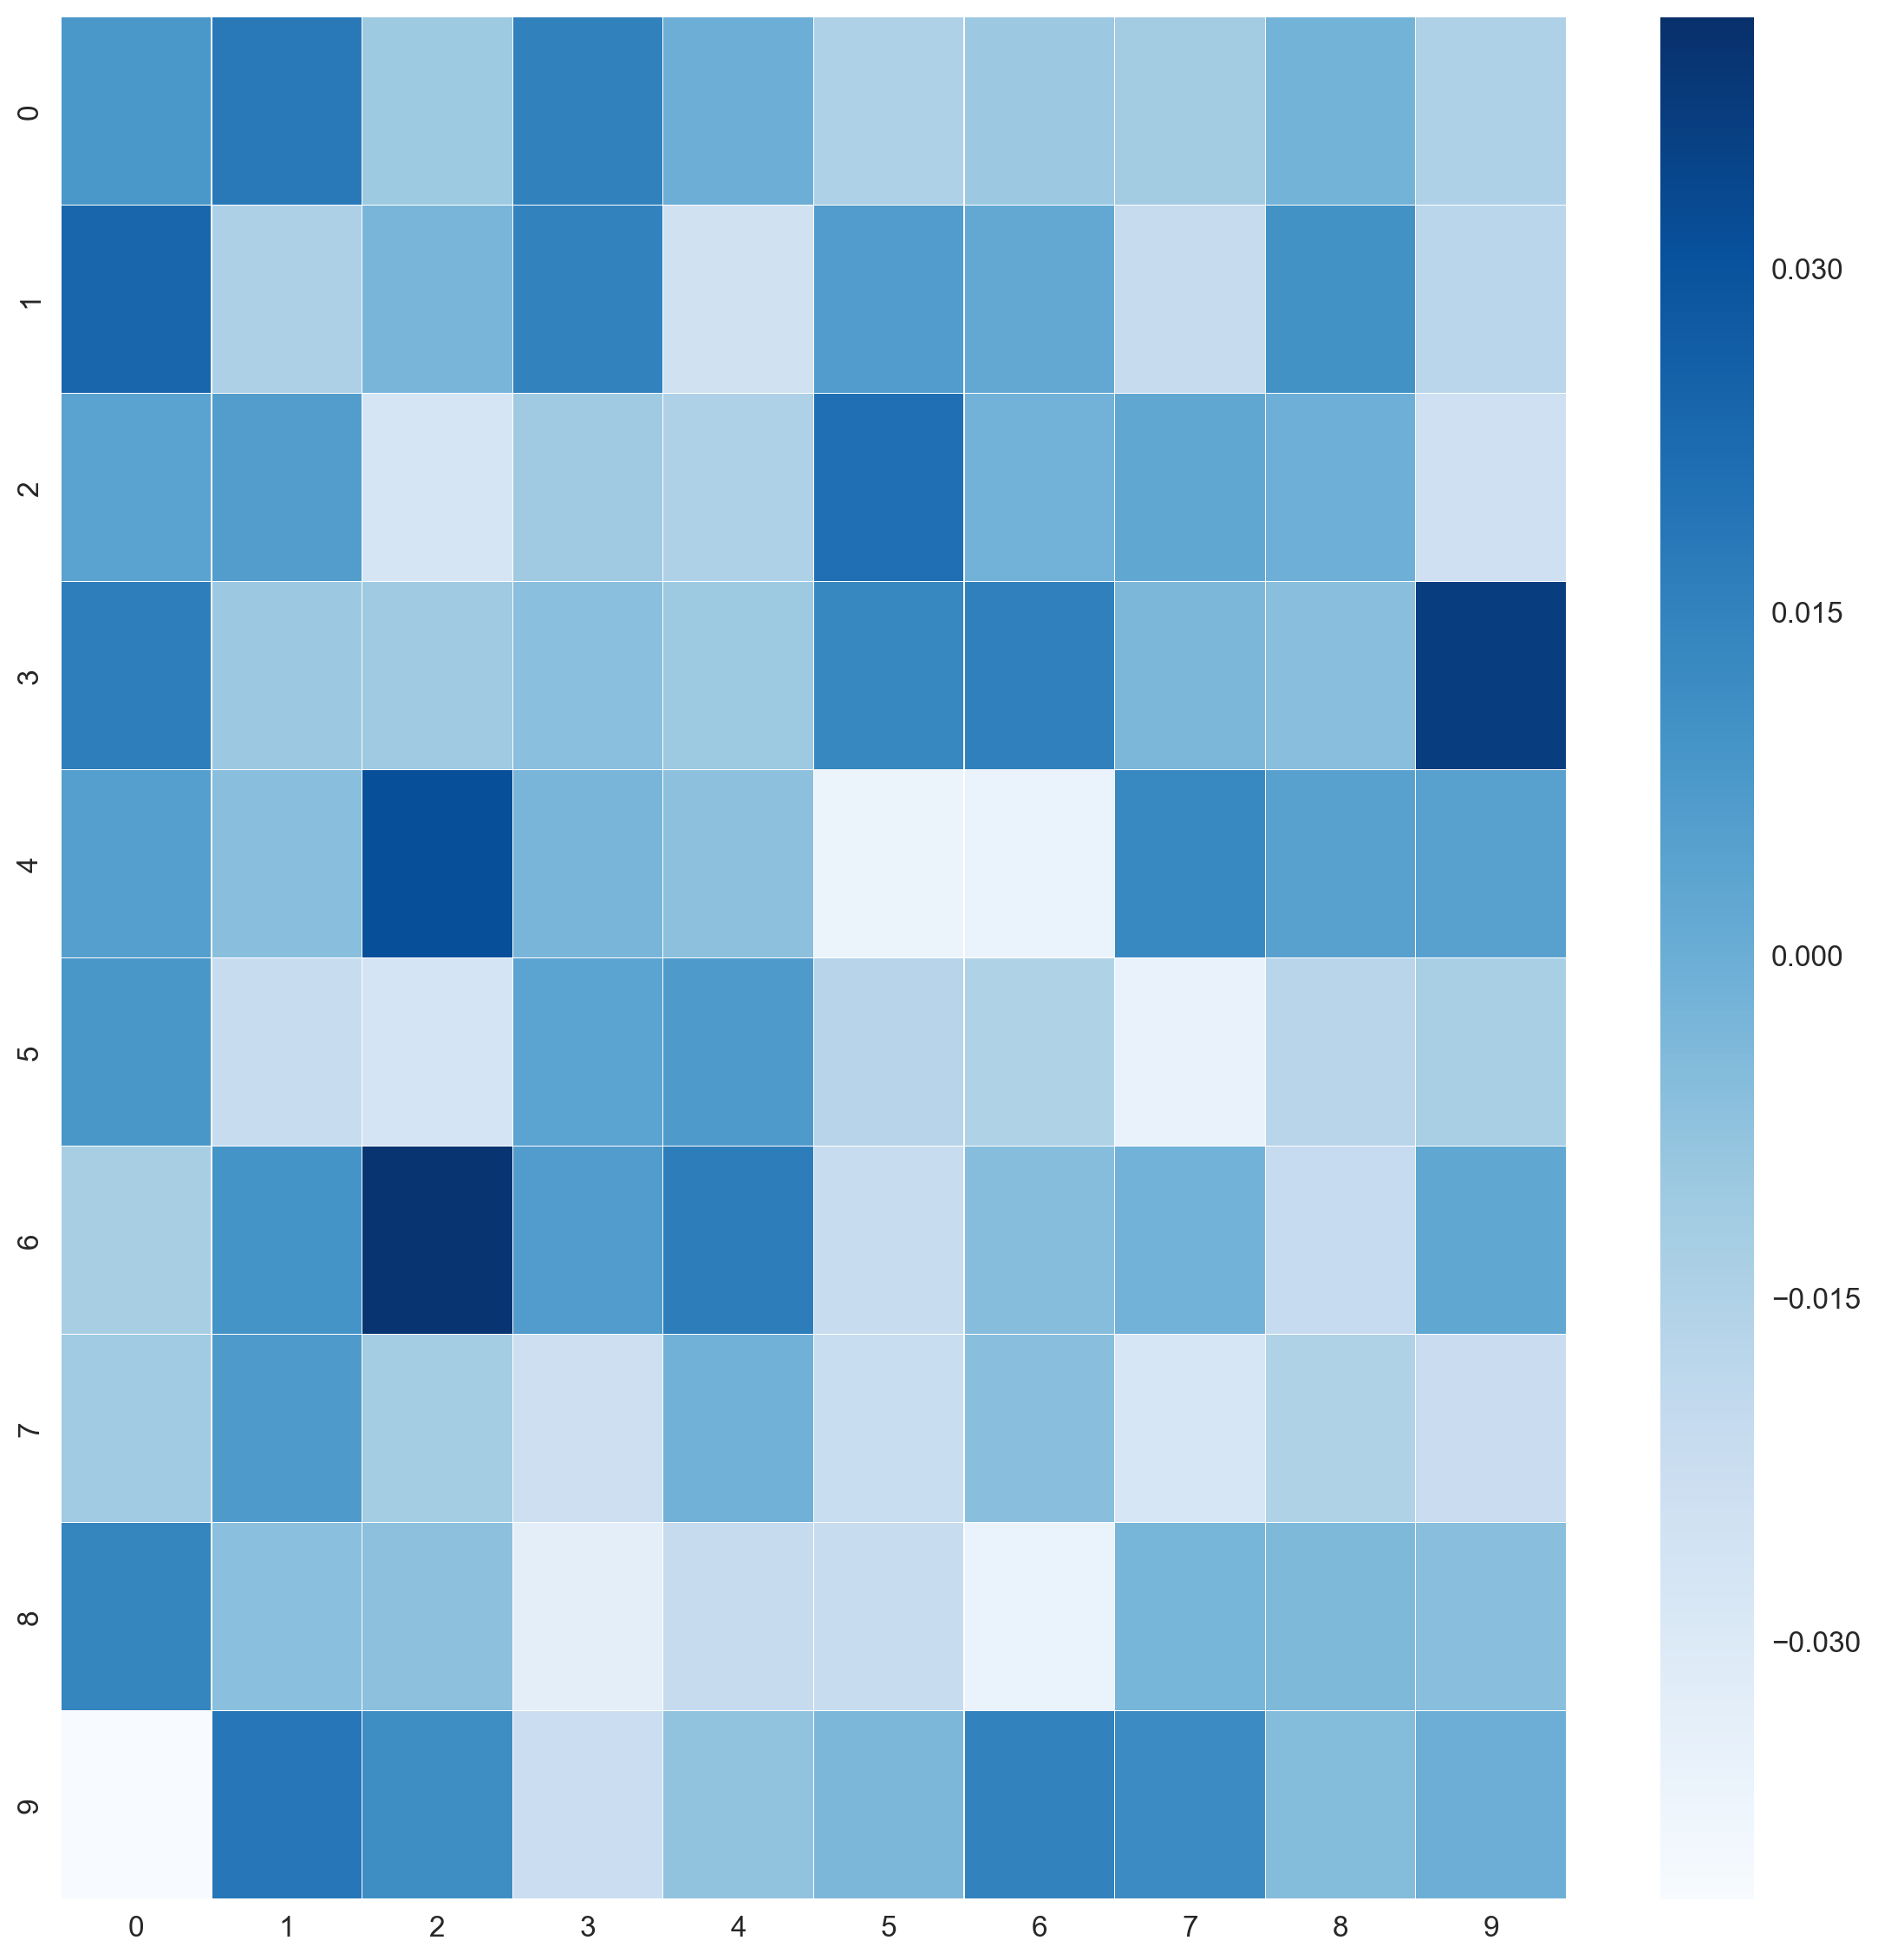

In [177]:
## This is a mess, plotting heat maps individually for each expt :( The truncated CorrSet1 object is so that
## the heatmap is squared. Will write code to do this on sorted object values later. 

# CorrSet144 = np.array(Corr_set1[0:144])
# CorrSet144_norm = (CorrSet144 - CorrSet144.mean()) / (CorrSet144.max() - CorrSet144.min())
CorrSetMat = np.reshape(CorrSet100, (10,10))

fig, axes = plt.subplots(figsize=(14,14))
axes = sns.heatmap(CorrSetMat, cmap=plt.cm.Blues, linewidths=0.1)
sns.set(font_scale=1.2)
sns.set_style({"savefig.dpi": 200})
plt.savefig('Corr heatmap expt 504593468')

In [47]:
rand_exp = boc.get_ophys_experiment_data(503019786)
ns_data = NaturalScenes(rand_exp)

In [46]:
motion_trace = allExptMotion_df.iloc[1].values # index value must match exptID index from ExptMetaData_275_B DF

In [48]:
sweep_response, mean_sweep_response = get_sweep_response_motion(ns_data, motion_trace)

,0,1,2,3,4,5,6,7,8,9,...,353,354,355,356,357,358,359,360,dx,mx
0,4.258606,5.111447,2.686667,0.475713,142.717331,2.075426,8.270674,4.411852,7.517922,8.625346,...,9.297763,11.714025,3.426245,28.956909,9.603163,28.495579,10.036753,7.095938,-0.024170,2.292182
1,6.177594,4.957156,5.031003,-0.505623,93.084717,11.924901,14.055989,6.015756,6.086728,21.442974,...,13.056925,5.488682,5.145836,54.407509,12.876277,7.465882,7.717814,10.341934,0.211641,2.345506
2,0.942454,3.443982,9.997983,-0.498659,-1.876897,13.290335,7.010552,1.050204,1.555482,49.704323,...,2.273237,-1.592358,5.332667,7.996364,3.569551,-8.913571,3.578582,11.911534,0.067113,2.559124
3,-0.209798,1.300964,8.475204,-3.655411,-30.294504,10.212638,-0.848610,-2.320865,1.076570,30.363541,...,-8.387765,1.572527,2.432924,-13.365759,-2.812465,-12.992055,4.384866,36.117538,0.081494,2.572424
4,-3.994033,0.186910,-0.787623,-5.930886,-39.568630,4.579988,-7.414619,-3.039244,0.431461,-3.609889,...,-10.464116,-0.143639,2.568463,-20.769571,-5.353131,-15.405295,4.061352,29.615110,-0.036904,2.660197
5,-10.476174,-3.070326,-6.456960,-5.611819,-21.003630,-6.769910,-9.789058,-3.514311,-3.564838,-17.421246,...,-13.573125,-1.510799,2.557960,-28.053162,-7.895256,-15.460814,-1.544863,-13.895988,-0.044052,3.116570
6,-7.051026,-8.319352,-10.828753,-3.843756,4.889893,-9.173134,-9.467562,-9.723683,-6.257680,-23.848694,...,-11.406248,-3.958799,-5.098828,52.544094,-8.273717,-12.968033,-4.689059,-19.998016,0.007580,4.005497
7,-2.707957,-9.440743,-8.331487,-4.049641,7.260521,-6.430440,-5.652096,-8.040338,-6.098742,-17.934366,...,-5.924944,-6.200185,-7.031060,178.041534,-5.958183,-11.159575,-5.213657,-14.270996,0.031215,5.854894
8,4.612766,-2.538214,-0.056655,-3.605804,-7.544422,-2.095062,2.686362,-3.758929,-1.719485,-6.546458,...,-4.256131,-3.722086,-3.651666,54.453270,-2.409254,-5.760291,-2.492386,-2.552828,0.050981,6.956454
9,1.043511,1.330935,1.303869,-0.511627,-17.383078,-0.091581,8.059920,-2.259243,0.794654,-2.502076,...,-3.642174,1.841493,-4.771912,-27.009092,-2.449028,1.638917,-0.913008,8.373896,-0.111826,5.514894


In [1]:
# Scatter plot for a single cell's motion correction per trial (X axis) 
# and corrected fluorescence trace (Y axis)

plt.scatter(mean_sweep_response.iloc[:,-1], mean_sweep_response.iloc[:,1])


In [89]:
# Correlations for motion correction and corrected fluorescence trace, changing index values by hand before writing 
# for loop
num_cells=len(mean_sweep_response.iloc[5])-2
corr_arr = np.zeros(num_cells)
for i in range(num_cells):
    tempCorr = np.corrcoef(mean_sweep_response.iloc[:,-1].values, mean_sweep_response.iloc[:,i].values)[0,1]
    corr_arr[i] = tempCorr
    print('Correlation coefficient for cell#%d: %f' % (i+1, tempCorr))

print('Highest corr coeff: ', corr_arr.max())
print('Lowest corr coeff:', corr_arr.min())

In [29]:
# Random example written with the help of Kam to plot motion over time

rand_exp = boc.get_ophys_experiment_data(506278598)
motion_df= rand_exp.get_motion_correction()

x_motion = np.diff(motion_df['x_motion'].values)
y_motion = np.diff(motion_df['y_motion'].values)


plt.plot(np.diff(x_motion))
plt.hold(True)
plt.plot(np.diff(y_motion), alpha = 0.5)

np.sqrt(np.sum(x_motion**2 + y_motion**2)/float(len(x_motion)))

In [20]:
stim_dats = rand_exp.get_stimulus_table('natural_scenes')

In [49]:
timestamp, traces = rand_exp.get_corrected_fluorescence_traces()

In [31]:
plt.figure()
fig, axes = plt.subplots(nrows=3, sharex=True, figsize=(10,8))

axes[0].plot(traces[1])
axes[1].plot(x_motion)
axes[2].plot(y_motion)

axes[0].set_xlim(xmin = 0, xmax = len(traces[1]))
axes[0].set_ylim(ymin = traces[1].min()-25, ymax = traces[1].max()+25)

axes[2].set_xlabel('Session frames')
axes[0].set_ylabel('Corrected fluorescence trace')
axes[1].set_ylabel('X-axis motion correction')
axes[2].set_ylabel('Y-axis motion correction')

plt.savefig('Signal-X-Y-Motion', dpi=600)


for i in range(len(stim_dats)):
    plt.axvspan(xmin=stim_dats.start[i], xmax=stim_dats.end[i], alpha=0.1, color='pink')
    


In [67]:
# Least squares polynomial regression for motion correction and corrected fluorescence trace

num_cells=len(mean_sweep_response.iloc[0])-2
poly_corr_arr = np.zeros(num_cells)
poly_corr_arr = []
for i in range(num_cells):
    tempCorr = np.polyfit(mean_sweep_response.iloc[:,-1].values, mean_sweep_response.iloc[:,i].values, deg=2)
    poly_corr_arr.append(tempCorr)
    #print('PolyCorrelation coefficient for cell#%d: %f' % (i+1, float(tempCorr)))
poly_corr_arr

In [66]:
poly = []
for i in poly_corr_arr:
    for n in i:
        poly.append(n)
        print np.max(np.asarray(poly))

<div style="background: #DFF0D8; border-radius: 3px; padding: 10px;">
<p>**Possible future directions:**  
</div>

+ Use linear SVM with cell fluorescence trial values as features (use top 15 cells?) to predict high vs low motion trials.
    - Consider (1) training within and (2) across experiments